# <font color='Green'>Lead Scoring Case Study

### <font color='indigo'>Problem Statement 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

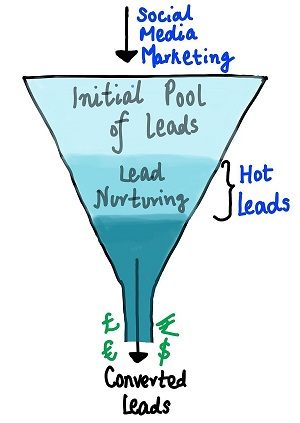

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### <font color='indigo'>Goals of the Case Study

**Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**

### <font color='indigo'>Importing the libraries & warnings.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from IPython.core.display import display, HTML
display(HTML("<style>.cm-s-ipython span.cm-comment { color: blue; }</style>"))

### <font color='indigo'> Import Data 

In [4]:
#Read the dataset and check the first five rows
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## <font color='indigo'>Data Understanding

In [5]:
# Check the shape of the dataframe

lead_df.shape

(9240, 37)

In [6]:
# Check the datatypes and non-null value count of all the columns of the dataframe

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Check the quantitative spread of this dataset

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### <font color='indigo'>Data Cleaning

#### <font color='brown'>From the data provided and the description we can see that many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. Normally it happens when customers fail to select any option form the drop down menu. We will convert those as Null values.

In [8]:
# Relacing 'Select' with np.NaN.
lead_df = lead_df.replace('Select', np.nan)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### <font color='green'>Checking for Duplicates

In [9]:
# Checking for duplicates and dropping the entire duplicate row if any
lead_df_dup = lead_df.copy()

lead_df_dup.drop_duplicates(subset=None, inplace=True)
lead_df_dup.shape

(9240, 37)

#### <font color='brown'>From the above it is clear that we dont have any duplicates as the shape is same for both the datasets.

In [10]:
#Check the number of null values in the columns
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#Percentage of missing values.
lead_per = (100 * lead_df.isnull().sum()/len(lead_df))
lead_per

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
#Columns with high percentage of missing values (> 40%).  
lead_per_40 = lead_per[lead_per > 40] 
lead_per_40

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

#### <font color='brown'>We can remove the columns with high percentage of missing values.

## <font color='indigo'>Missing Value Treatment

In [13]:
#Creating a list of all columns with high percaentage for ease of working.
lead_null_40 = list(lead_per_40.index)
lead_null_40

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [14]:
#Remove the columns having more than 40% null/missing values.
lead_df.drop(lead_null_40, axis = 1, inplace = True)

In [15]:
lead_df.shape

(9240, 30)

In [16]:
#Percentage of missing values > 0 after dropping the columns with high missing values.
lead_per1 = 100 * lead_df.isnull().sum()/len(lead_df)
lead_per1 = lead_per1[lead_per1 > 0]
lead_per1

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
City                                             39.707792
dtype: float64

In [17]:
# Checking for the number of columns with missing values.
lead_per1.shape

(10,)

#### <font color='brown'>We have 10 columns with null values, we can either remove them or impute them. For catagorical data we can use mode() and for quantitative data we can use median to imputate the missing values.

### <font color='green'> City

In [18]:
lead_df["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
#Impute missing values using mode as City is catagorical data.
lead_df["City"] = lead_df["City"].fillna(lead_df["City"].mode()[0])
lead_df["City"].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

### <font color='green'> Tags

In [20]:
lead_df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [21]:
#Impute missing values using mode as Tags is catagorical data.
lead_df["Tags"] = lead_df["Tags"].fillna(lead_df["Tags"].mode()[0])
lead_df["Tags"].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

### <font color='green'> What matters most to you in choosing a course

In [22]:
lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
#Impute missing values using mode as "What matters most to you in choosing a course" is catagorical data.
lead_df["What matters most to you in choosing a course"] = lead_df["What matters most to you in choosing a course"].fillna(lead_df["What matters most to you in choosing a course"].mode()[0])
lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### <font color='brown'>We will drop this column as it is highly skewed. it will not give any relevant information.

In [24]:
# Dropping column
lead_df = lead_df.drop(["What matters most to you in choosing a course"], axis = 1)

### <font color='green'>What is your current occupation

In [25]:
lead_df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
#Impute missing values using mode as What is your current occupationis catagorical data.
lead_df["What is your current occupation"] = lead_df["What is your current occupation"].fillna("Not Specified")
lead_df["What is your current occupation"].value_counts()

Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### <font color='green'> Specialization

In [27]:
lead_df["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### <font color='brown'>From the data dictionary we can understand that'Select Specialization' which means the customer had not selected this option while filling the form. So they can be either unemployed or students or may be customer didnt select their specialization. Hence we will impute the null values with not specified.

In [28]:
#Impute missing values using mode as Specialization is catagorical data.
lead_df["Specialization"] = lead_df["Specialization"].fillna("Not Specified")
lead_df["Specialization"].value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### <font color='green'> Country

In [29]:
lead_df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [30]:
#Impute missing values using mode as Country" is catagorical data.
lead_df["Country"] = lead_df["Country"].fillna(lead_df["Country"].mode()[0])
lead_df["Country"].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### <font color='brown'>We will drop this column as it is highly skewed. it will not give any relevant information.

In [31]:
# Dropping column
lead_df = lead_df.drop(["Country"], axis = 1)

#### <font color='brown'>Remaining 4 variables with null values have a null value count of less than 1.5%. Hence we will drop those rows.

In [32]:
# dropping the remaining columns with null values having null values of less than 1.5%
lead_df.dropna(inplace = True)

In [33]:
# Check the shape of the dataframe

lead_df.shape

(9074, 28)

In [34]:
#Percentage of missing values.
lead_per1 = (100 * lead_df.isnull().sum()/len(lead_df))
lead_per1

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

### <font color='green'>Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement

#### <font color='brown'>The above 6 columns indicates whether the customer had seen the ad in any of the listed items.

In [35]:
# Counts of unique values in Search.
lead_df["Search"].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [36]:
# Counts of unique values in Magazine.
lead_df["Magazine"].value_counts()

No    9074
Name: Magazine, dtype: int64

In [37]:
# Counts of unique values in Newspaper Article.
lead_df["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [38]:
# Counts of unique values in X Education Forums.
lead_df["X Education Forums"].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [39]:
# Counts of unique values in Newspaper.
lead_df["Newspaper"].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [40]:
# Counts of unique values in Digital Advertisement.
lead_df["Digital Advertisement"].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

#### <font color='brown'> From the unique value count of the above 6 columns we can see that most values in the columns are inclined to one side only, i'e most values in these columns are 'No'. Hence we cannot derive any useful information from these 6 columns.

### <font color='green'>Through Recommendations

In [41]:
# Counts of unique values in Through Recommendations.
lead_df["Through Recommendations"].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

#### <font color='brown'> From the unique value count of the above column we can see that most values in the column is inclined to one side only, i'e most values in these columns are 'No'. Hence we cannot derive any useful information from the above column.

### <font color='green'>Receive More Updates About Our Courses

In [42]:
# Counts of unique values of customers who chose to receive more updates about the courses.
lead_df["Receive More Updates About Our Courses"].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

#### <font color='brown'> From the unique value count of the above column we can see that most values in the column is inclined to one side only, i'e most values in these columns are 'No'. Hence we cannot derive any useful information from the above column.

### <font color='green'>Update me on Supply Chain Content

In [43]:
# Counts of unique values in Update me on Supply Chain Content.
lead_df["Update me on Supply Chain Content"].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

#### <font color='brown'> From the unique value count of the above column we can see that most values in the column is inclined to one side only, i'e most values in these columns are 'No'. Hence we cannot derive any useful information from the above column. We well drop this column as they dont provide any relevant information.

### <font color='green'>Get updates on DM Content

In [44]:
# Counts of unique values in Get updates on DM Content.
lead_df["Get updates on DM Content"].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

#### <font color='brown'> From the unique value count of the above column we can see that most values in the column is inclined to one side only, i'e most values in these columns are 'No'. Hence we cannot derive any useful information from the above column.

### <font color='green'>I agree to pay the amount through cheque

In [45]:
# Counts of unique values of customer who has agreed to pay the amount through cheque or not.
lead_df["I agree to pay the amount through cheque"].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

#### <font color='brown'> From the unique value count of the above column we can see that most values in the column is inclined to one side only, i'e most values in these columns are 'No'. Hence we cannot derive any useful information from the above column.

## <font color='indigo'>Outlier detection and Handling

In [46]:
#Check the quantitative spread of this dataset

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [47]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
lead_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


In [48]:
out_col=["Lead Number","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

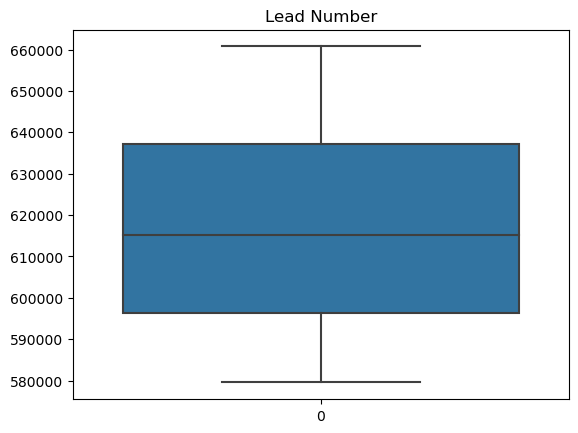

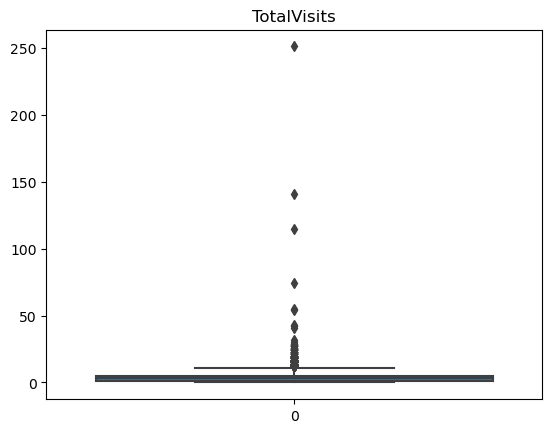

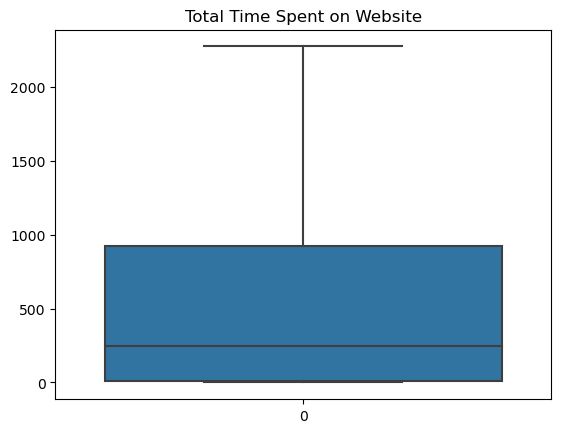

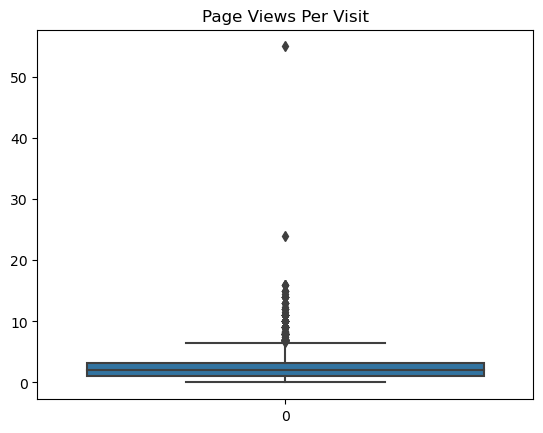

In [49]:
for i in out_col:
    sns.boxplot(lead_df[i])
    plt.title(i)
    plt.show()

#### <font color='brown'> We will remove values which are above the 95th percentile.

In [50]:
lead_df = lead_df[lead_df['TotalVisits'] <= 10]

In [51]:
lead_df = lead_df[lead_df['Page Views Per Visit'] <= 6]

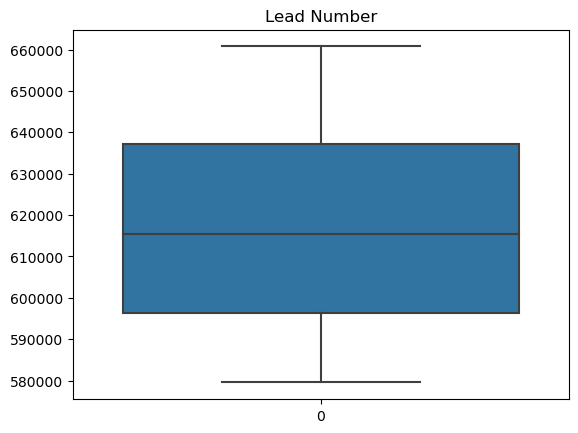

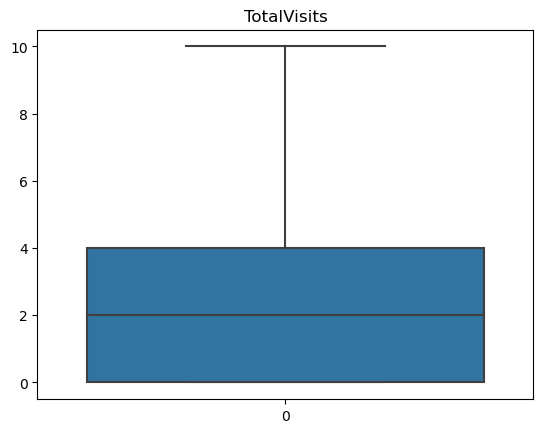

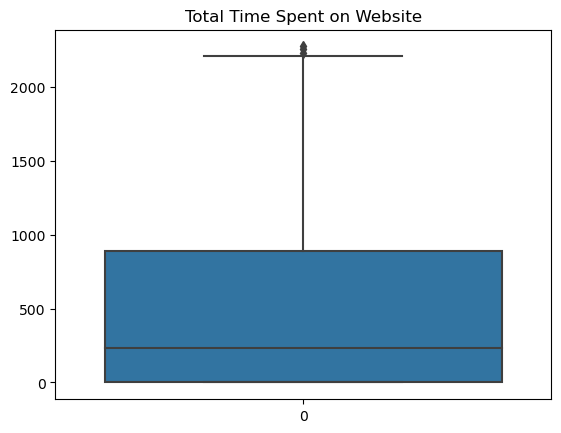

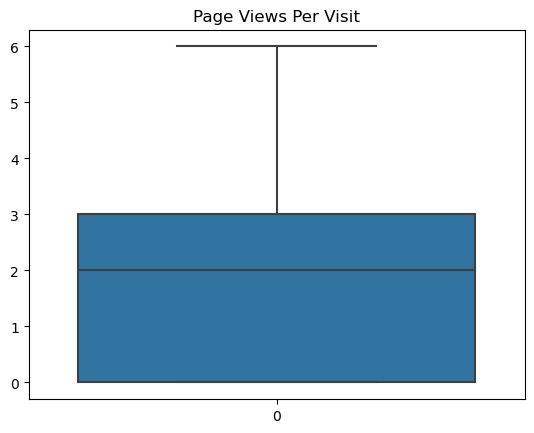

In [52]:
for i in out_col:
    sns.boxplot(lead_df[i])
    plt.title(i)
    plt.show()

#### <font color='brown'>From the above we can see that there are no outliers

In [53]:
lead_df.shape

(8445, 28)

## <font color='indigo'>Data Analysis

## <font color='indigo'> Univariate and Bivariate Analysis

### <font color='blue'>Categorical Variables

### <font color='green'>Converted

In [54]:
#Calculating number of lead convertions.
lead_df["Converted"].value_counts()

0    5280
1    3165
Name: Converted, dtype: int64

In [55]:
# Checking the success rate
Lead_df_success_rate = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Lead_df_success_rate

37.47779751332149

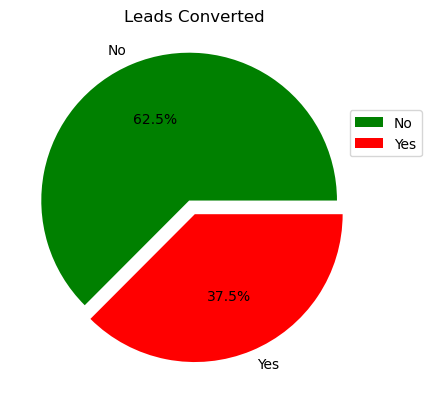

In [56]:
# Plotting pie chart for converted.
explode = (0.1, 0)
lead_df.groupby('Converted').size().plot(kind='pie', legend=True, labels= ["No", "Yes"],  explode=explode, autopct='%1.1f%%',colors=['green', 'red'])
plt.title('Leads Converted')
plt.legend(bbox_to_anchor=(0.9,0.8))
plt.show()

#### <font color='brown'> 37.5% times the leads were successfully converted comapred to 62.5% times where it was not converted.

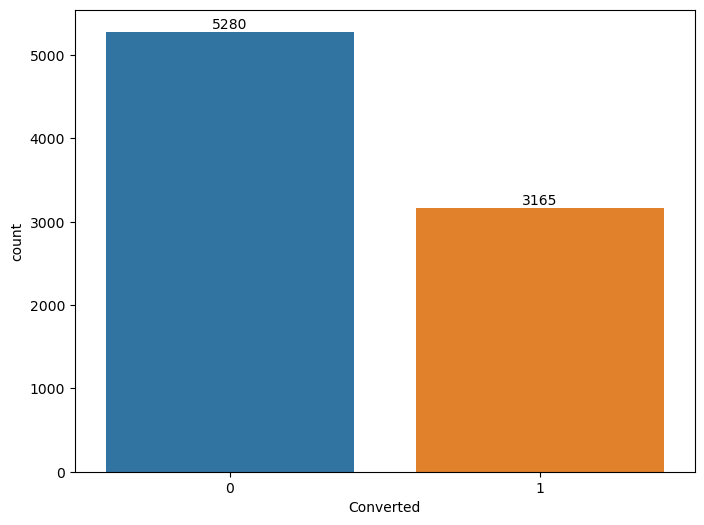

In [57]:
#Ploting total count of converted and not converted leads
plt.figure(figsize = (8,6))
ax = sns.countplot(x=lead_df["Converted"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### <font color='green'>Lead Origin

In [58]:
# Counts of unique values in Lead Origin.
lead_df["Lead Origin"].value_counts()

Landing Page Submission    4407
API                        3433
Lead Add Form               576
Lead Import                  29
Name: Lead Origin, dtype: int64

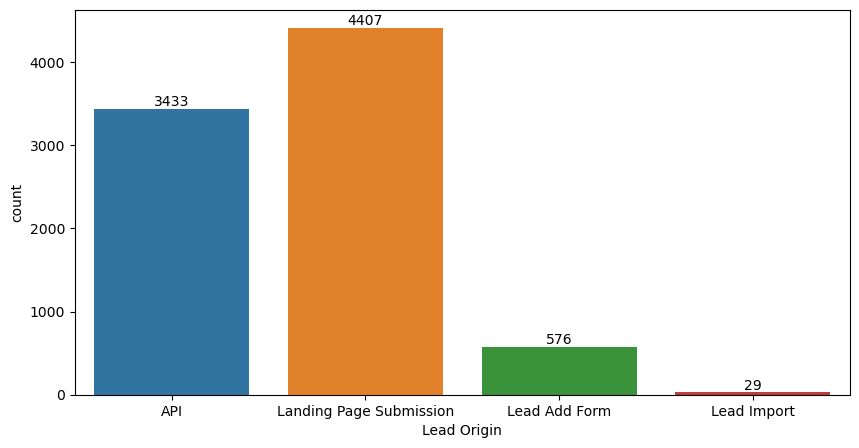

In [59]:
# Ploting total count of  origin identifier with which the customer was identified to be a lead.:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Lead Origin"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

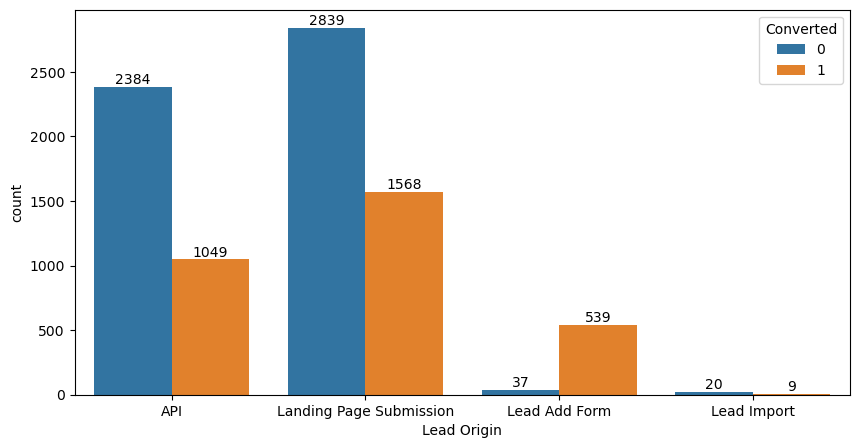

In [60]:
# Ploting total count of  origin identifier with which the customer was identified to be a lead W.R.T Lead Status.
plt.figure(figsize = (10,5))
ax = sns.countplot(data = lead_df, x=lead_df["Lead Origin"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### <font color='brown'> => Landing Page Submission and API has the highest lead count but their conversion rate is within a range of 30-40%.
    
#### <font color='brown'> => Lead Add Form has the highest conversion rate of more than 93% but overall lead count is less.
    
#### <font color='brown'> => Lead import has the least lead count.  

### <font color='green'>Lead Source

In [61]:
# Counts of unique values in Lead Source.
lead_df["Lead Source"].value_counts()

Google               2709
Direct Traffic       2349
Olark Chat           1742
Organic Search        919
Reference             440
Welingak Website      128
Referral Sites        102
Facebook               30
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### <font color='brown'> From the above we can see that there are columns Google and google which are basically same. Hence we will marge them into single variable.  

In [62]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

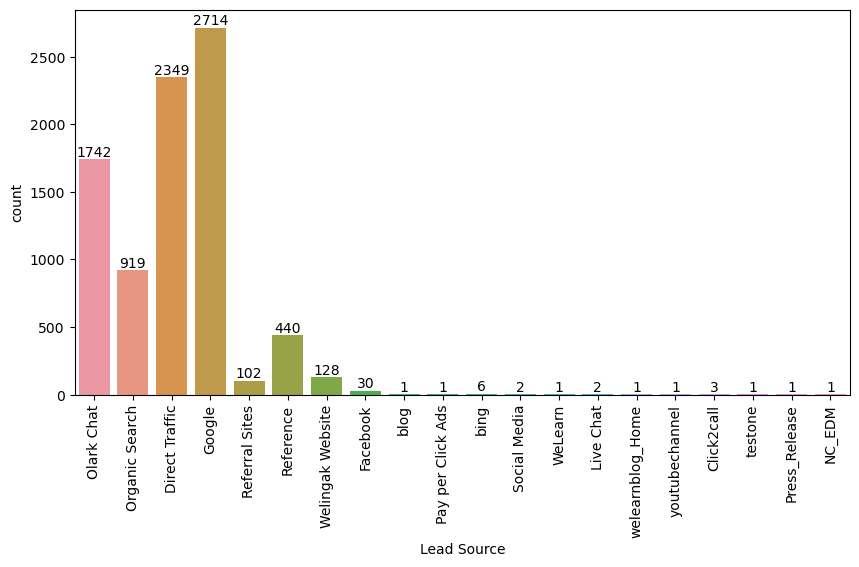

In [63]:
# Ploting total count of  source of the lead:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Lead Source"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

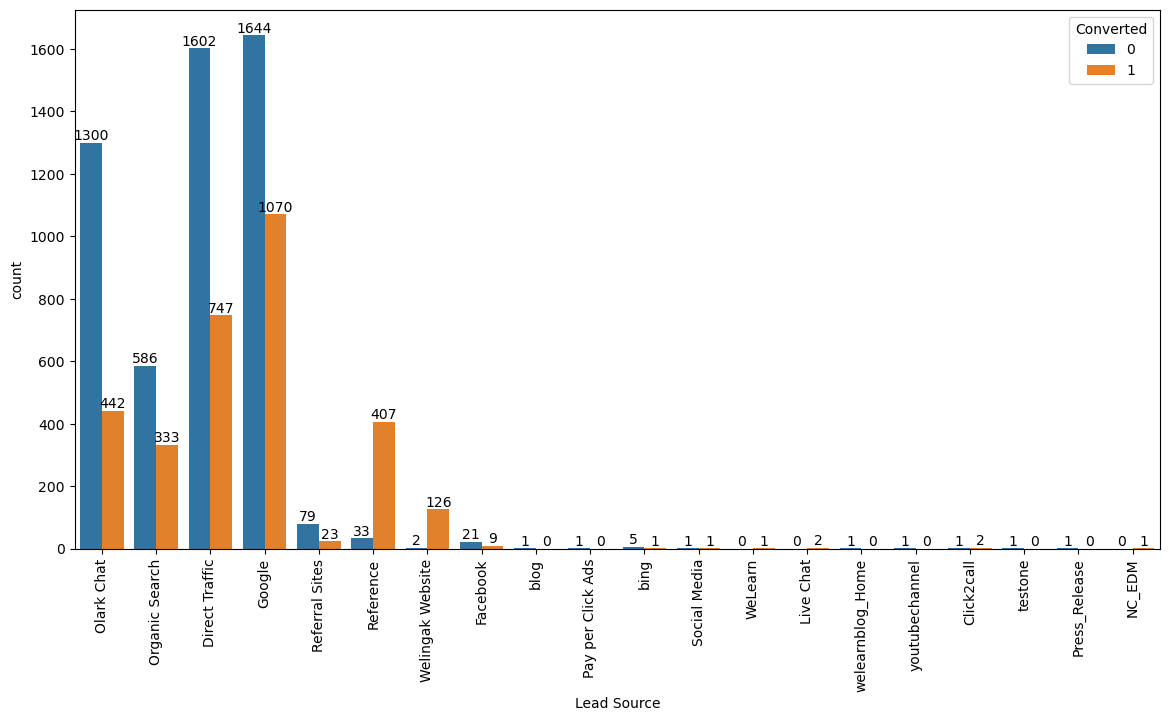

In [64]:
# Ploting total count of  lead source W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Lead Source"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

#### <font color='brown'> => Google and Direct Traffic has the highest lead count but the conversion rate is within a range of 30-40%.
    
#### <font color='brown'> => Reference has the highest conversion rate of more than 92% but overall lead count is less.

### <font color='green'>Do Not Email

In [65]:
# Counts of unique values in Do Not Email.
lead_df["Do Not Email"].value_counts()

No     7795
Yes     650
Name: Do Not Email, dtype: int64

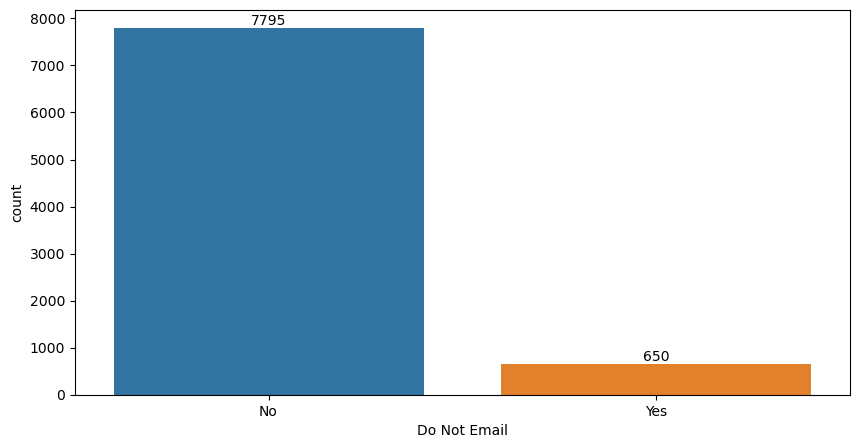

In [66]:
# Ploting total count of  Do Not Email.:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Do Not Email"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

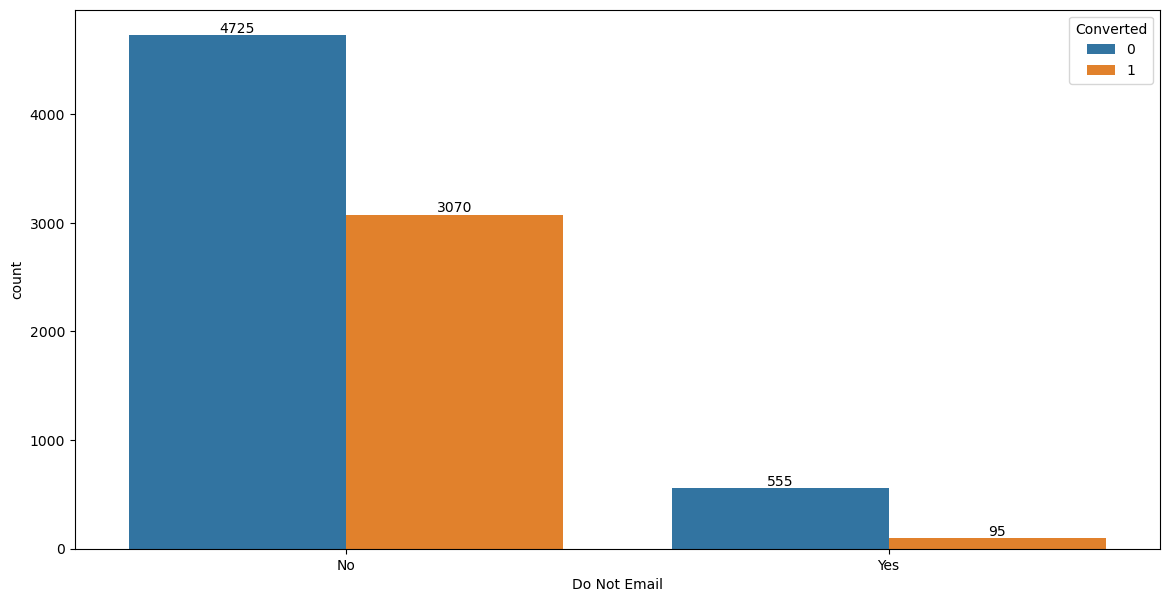

In [67]:
# Ploting total count of  Do Not Email W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Do Not Email"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### <font color='green'>Do Not Call

In [68]:
# Counts of unique values in Do Not Call.
lead_df["Do Not Call"].value_counts()

No     8443
Yes       2
Name: Do Not Call, dtype: int64

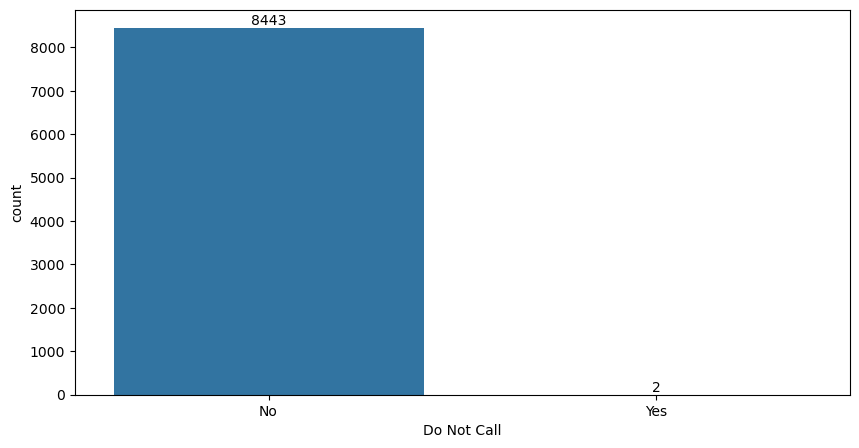

In [69]:
# Ploting total count of Do Not Call:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Do Not Call"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

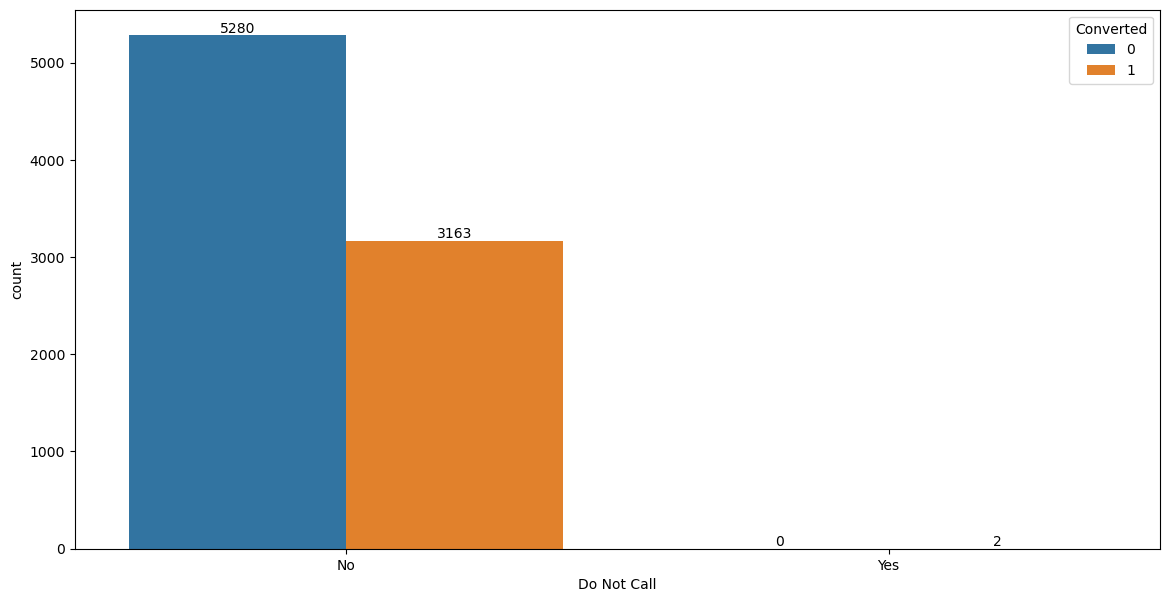

In [70]:
# Ploting total count of  Do Not Call W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Do Not Call"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### <font color='brown'> From the unique value count of the above 6 columns we can see that most values in the columns are inclined to one side only, i'e most values in these columns are 'No'. Hence we cannot derive any useful information from these 6 columns.

### <font color='green'>Last Activity

In [71]:
# Counts of unique values in Last Activity.
lead_df["Last Activity"].value_counts()

Email Opened                    3184
SMS Sent                        2537
Olark Chat Conversation          944
Page Visited on Website          513
Converted to Lead                425
Email Bounced                    302
Email Link Clicked               254
Form Submitted on Website        110
Unreachable                       84
Unsubscribed                      57
Had a Phone Conversation          20
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

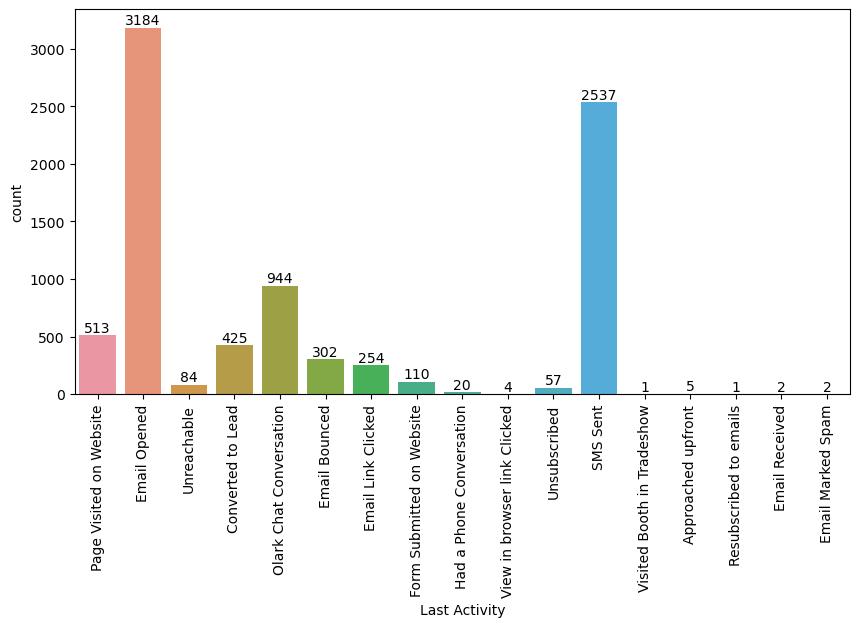

In [72]:
# Ploting total count of Last Activity:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Last Activity"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

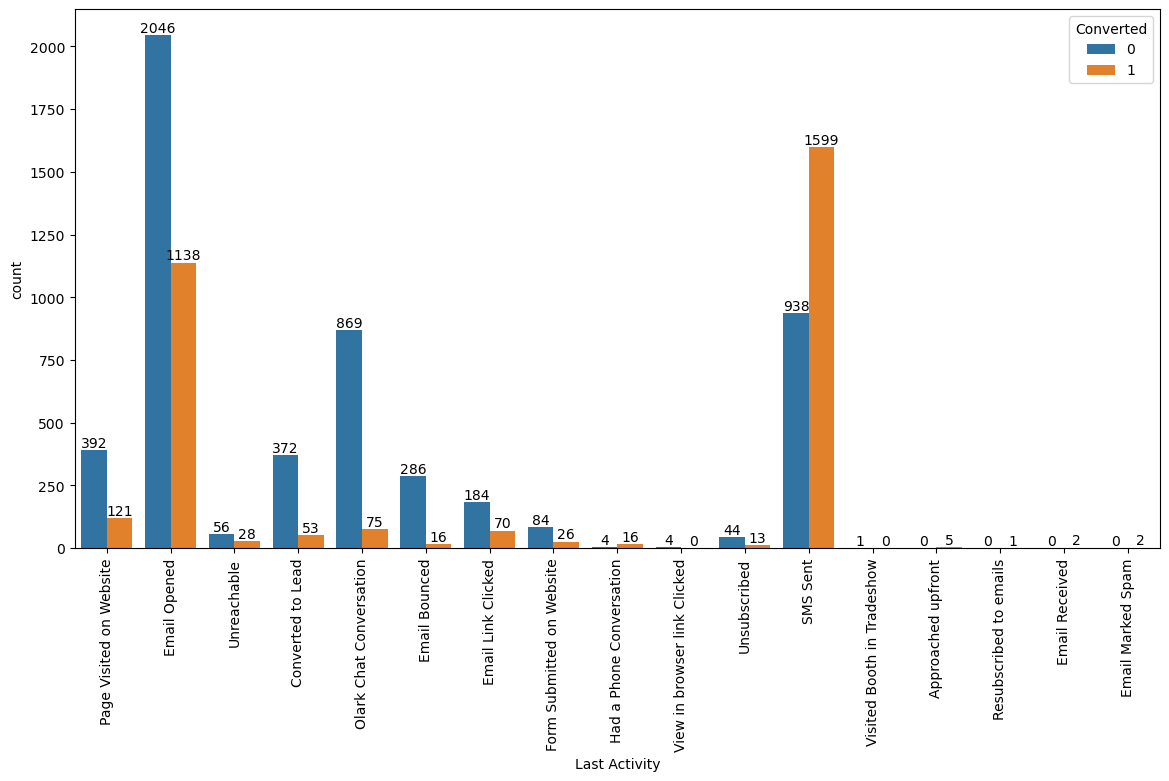

In [73]:
# Ploting total count of Last Activity W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Last Activity"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

#### <font color='brown'> => Email opened has the highest lead count but the conversion rate is within a range of 30-40%.
    
#### <font color='brown'> => SMS sent has the highest conversion rate of more than 62% with second highest lead count.

### <font color='green'>Specialization

In [74]:
# Counts of unique values in Specialization.
lead_df["Specialization"].value_counts()

Not Specified                        3186
Finance Management                    890
Marketing Management                  768
Human Resource Management             762
Operations Management                 471
Business Administration               363
IT Projects Management                337
Supply Chain Management               310
Banking, Investment And Insurance     289
Media and Advertising                 179
Travel and Tourism                    165
International Business                162
Healthcare Management                 133
Hospitality Management                101
E-COMMERCE                             97
Retail Management                      86
Rural and Agribusiness                 60
E-Business                             51
Services Excellence                    35
Name: Specialization, dtype: int64

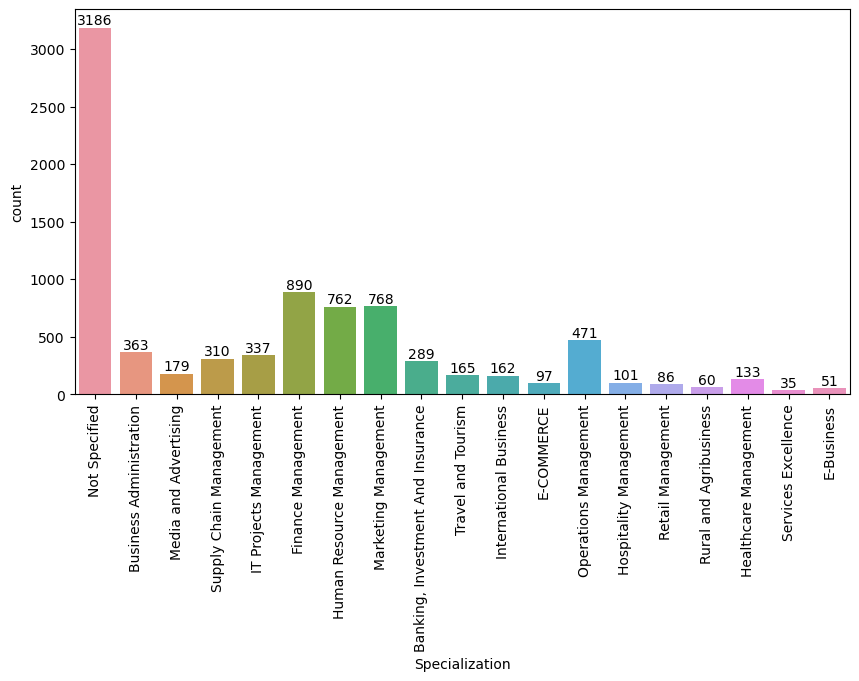

In [75]:
# Ploting total count of Specialization:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Specialization"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

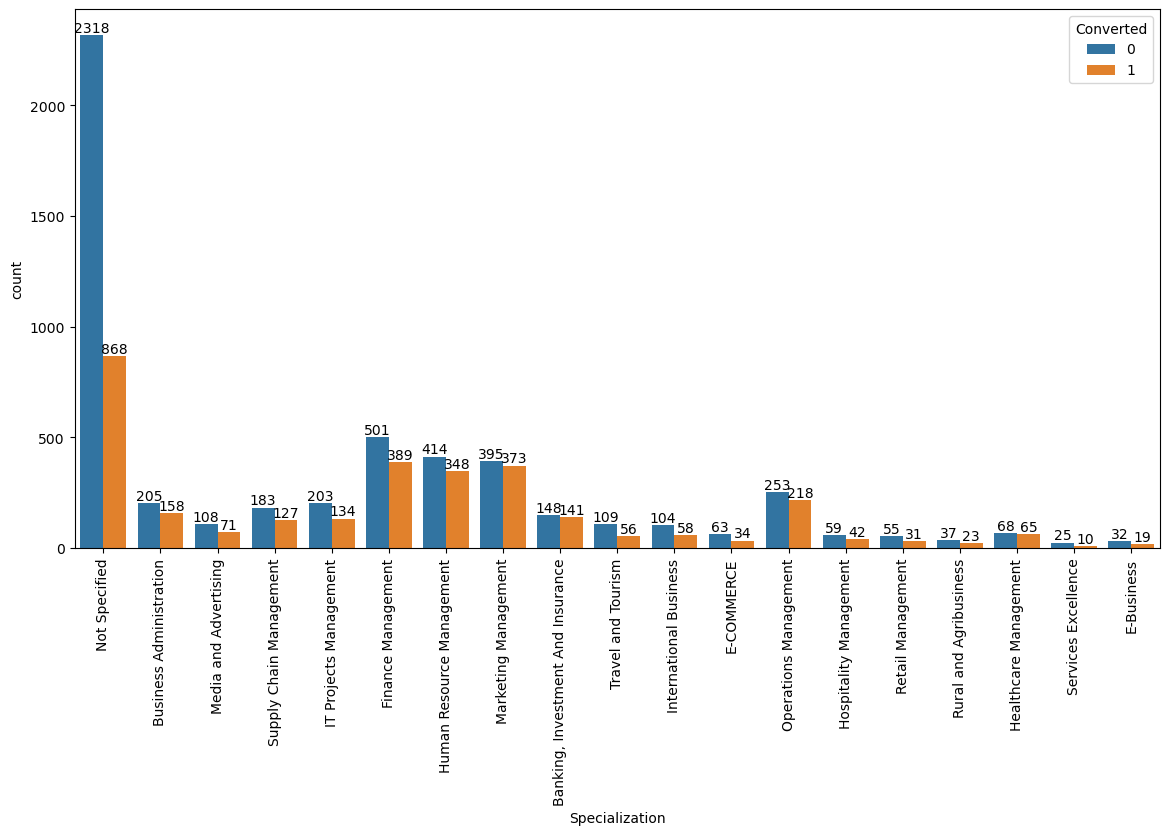

In [76]:
# Ploting total count of Specialization W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Specialization"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

#### <font color='brown'> => Specializations having management roles has higher leads and their conversion rates are also better.

### <font color='green'>What is your current occupation

In [77]:
# Counts of unique values in What is your current occupation.
lead_df["What is your current occupation"].value_counts()

Unemployed              5056
Not Specified           2536
Working Professional     630
Student                  197
Other                     12
Housewife                  9
Businessman                5
Name: What is your current occupation, dtype: int64

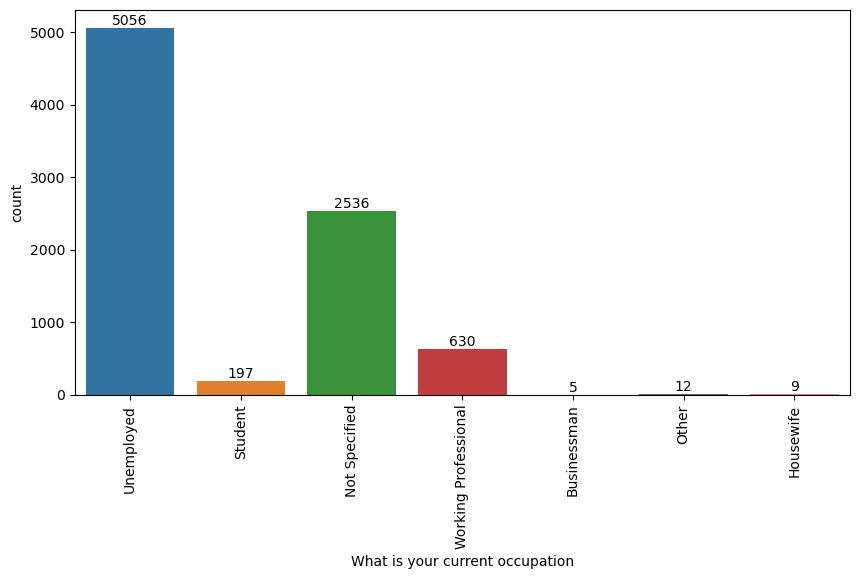

In [78]:
# Ploting total count of What is your current occupation:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["What is your current occupation"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

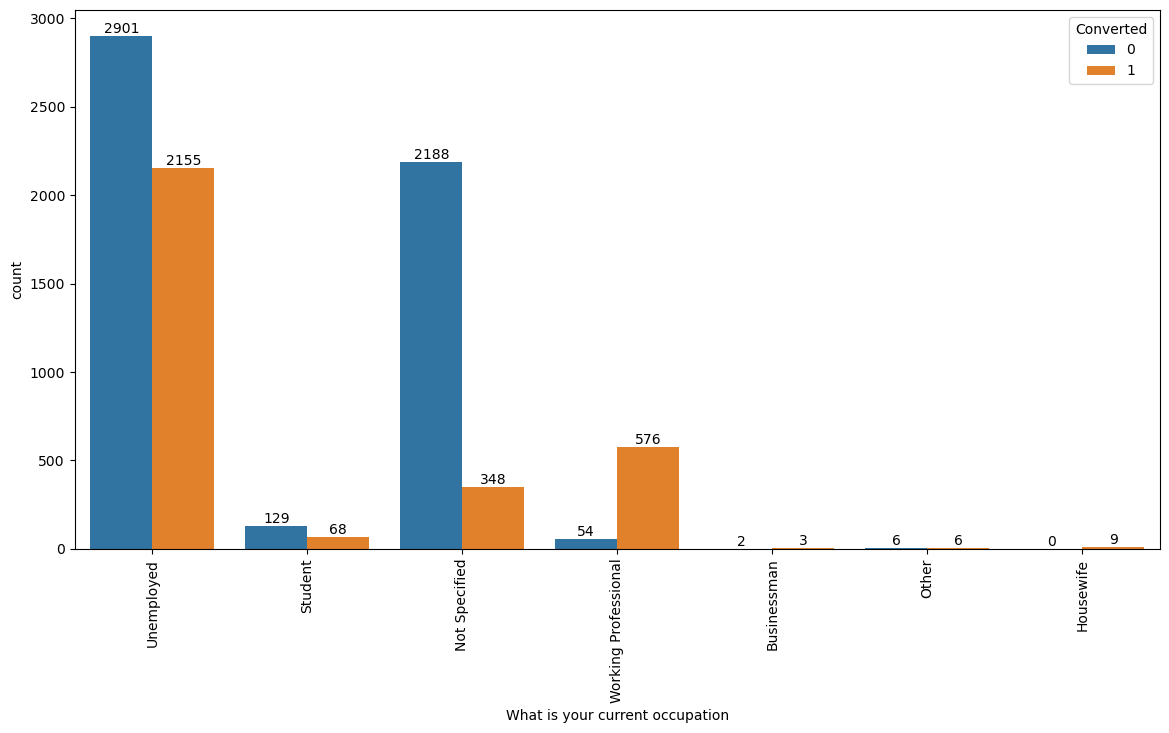

In [79]:
# Ploting total count of What is your current occupation W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["What is your current occupation"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

#### <font color='brown'> => Unemployed has the highest lead count but the conversion rate is under 43%.
    
#### <font color='brown'> => Working Professional has the highest conversion rate of more than 92% but lead count is less.

### <font color='green'>Tags

In [80]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [81]:
# Counts of unique values in Tags assigned to customers indicating the current status of the lead.
lead_df["Tags"].value_counts()

Will revert after reading the email                  5008
Ringing                                              1083
Interested in other courses                           478
Already a student                                     445
Closed by Horizzon                                    265
switched off                                          225
Busy                                                  166
Lost to EINS                                          161
Not doing further education                           133
Interested  in full time MBA                          107
Graduation in progress                                102
invalid number                                         71
Diploma holder (Not Eligible)                          61
wrong number given                                     40
opp hangup                                             29
number not provided                                    24
in touch with EINS                                     12
Lost to Others

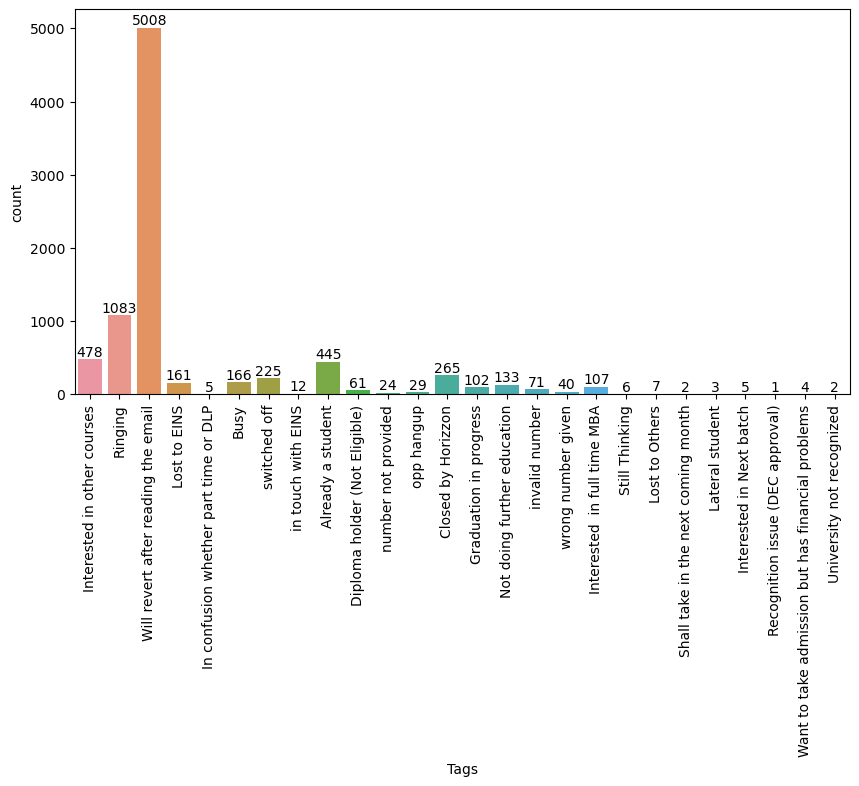

In [82]:
# Ploting total count of Tags:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Tags"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

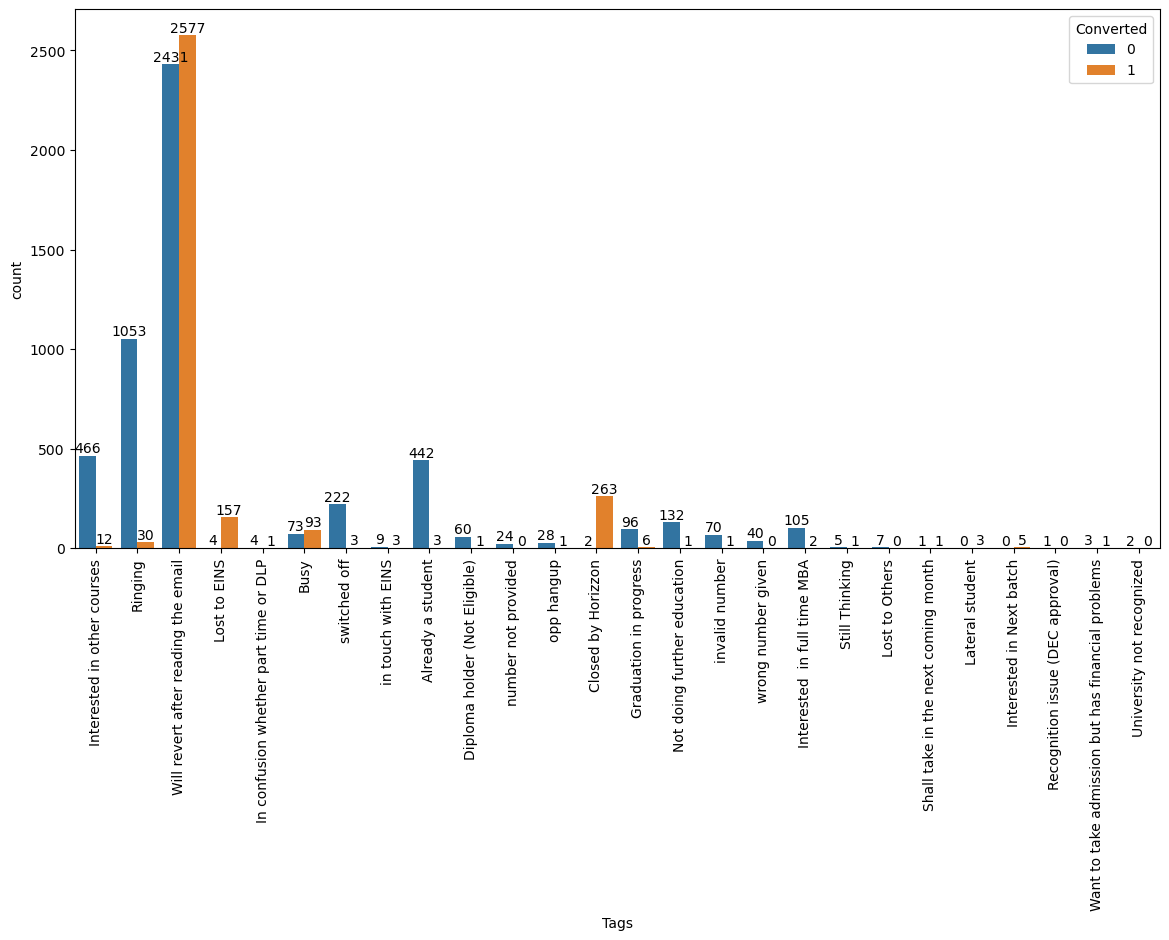

In [83]:
# Ploting total count of Tags W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Tags"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

#### <font color='brown'> These are Tags assigned to customers indicating the current status of the lead. This helps the company to segregate the customers according to their current status.

In [84]:
lead_df = lead_df.drop(["Tags"], axis = 1)

### <font color='green'>City

In [85]:
# Counts of unique values in City.
lead_df["City"].value_counts()

Mumbai                         6347
Thane & Outskirts               669
Other Cities                    612
Other Cities of Maharashtra     409
Other Metro Cities              341
Tier II Cities                   67
Name: City, dtype: int64

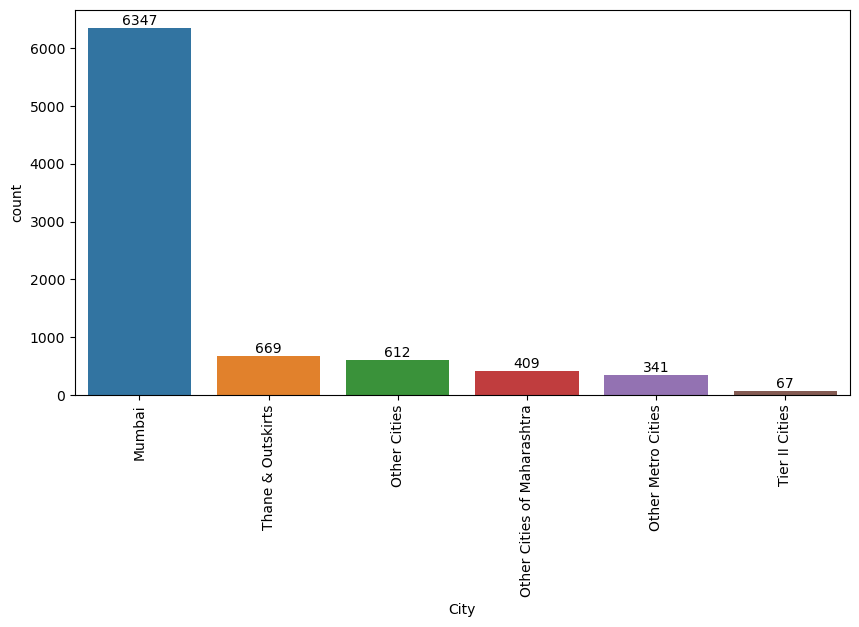

In [86]:
# Ploting total count of City:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["City"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

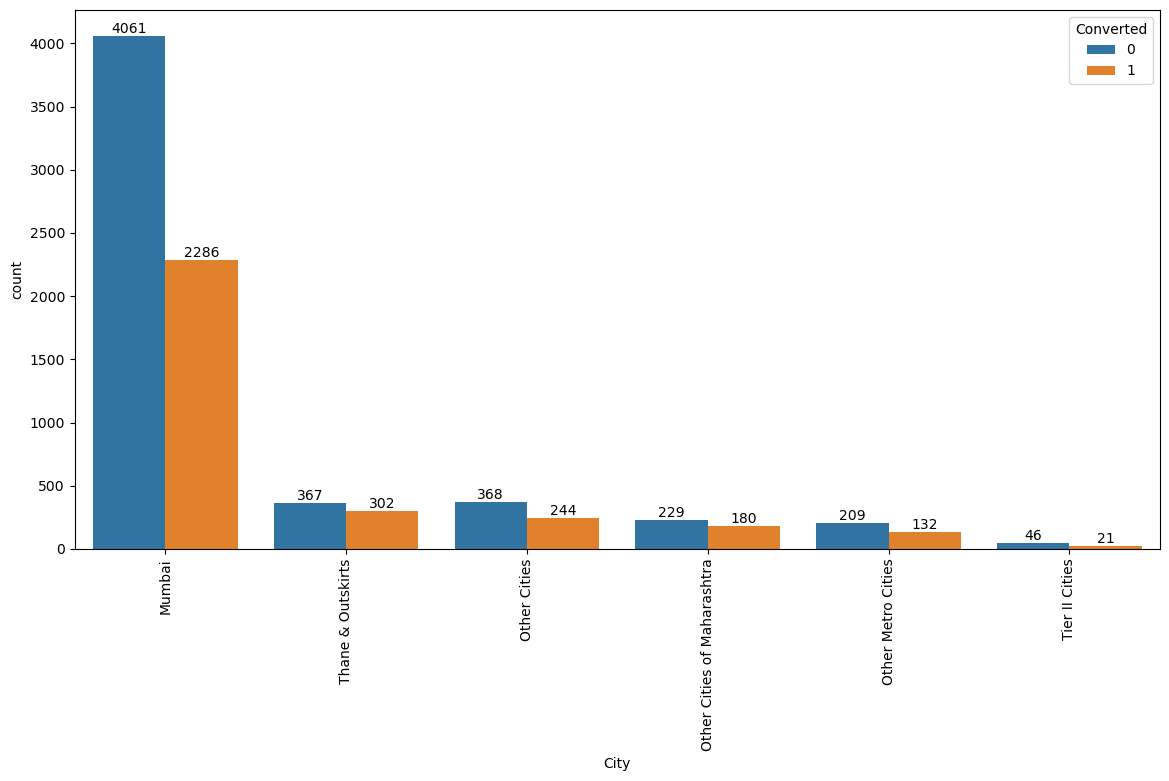

In [87]:
# Ploting total count of City W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["City"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

#### <font color='brown'> => Mumbai has the highest lead count but the conversion rate is just above 36%.
    
#### <font color='brown'> => For all others conversion rate is better but lead count is very less compared to Mumbai.    

### <font color='green'>A free copy of Mastering The Interview

In [88]:
# Counts of unique values of customer who wants a free copy of 'Mastering the Interview' or not.
lead_df["A free copy of Mastering The Interview"].value_counts()

No     5910
Yes    2535
Name: A free copy of Mastering The Interview, dtype: int64

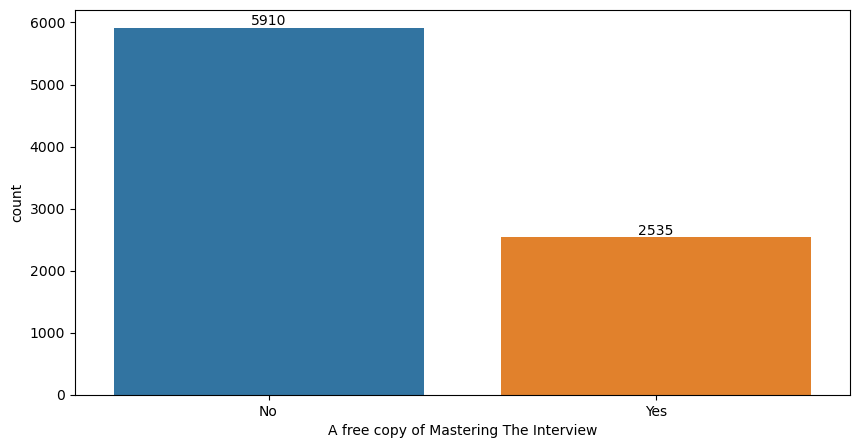

In [89]:
# Ploting total count of customer who wants a free copy of 'Mastering the Interview' or not:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["A free copy of Mastering The Interview"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

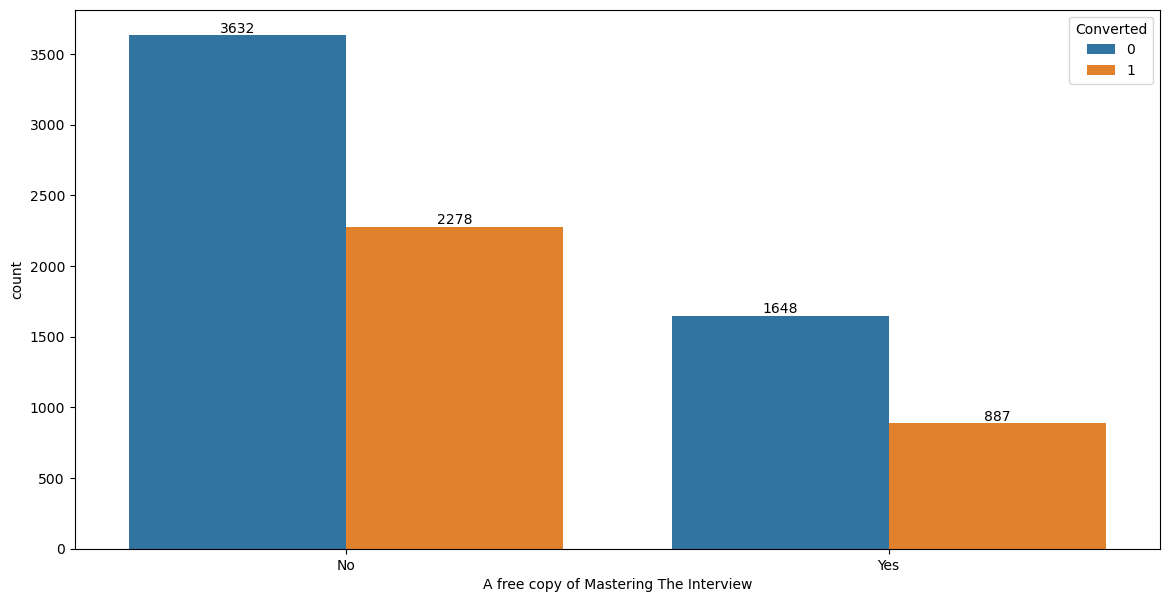

In [90]:
# Ploting total count of customer who wants a free copy of Mastering The Interview W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["A free copy of Mastering The Interview"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### <font color='brown'>Although No has more lead count, the conversion rate is similar for both customers who wants a free copy of Mastering The Interview or not.
    
  

### <font color='green'>Last Notable Activity

In [91]:
# Counts of unique values in Last Notable Activity.
lead_df["Last Notable Activity"].value_counts()

Modified                        3108
Email Opened                    2608
SMS Sent                        2009
Page Visited on Website          238
Olark Chat Conversation          173
Email Link Clicked               160
Email Bounced                     59
Unsubscribed                      43
Unreachable                       30
Had a Phone Conversation          10
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

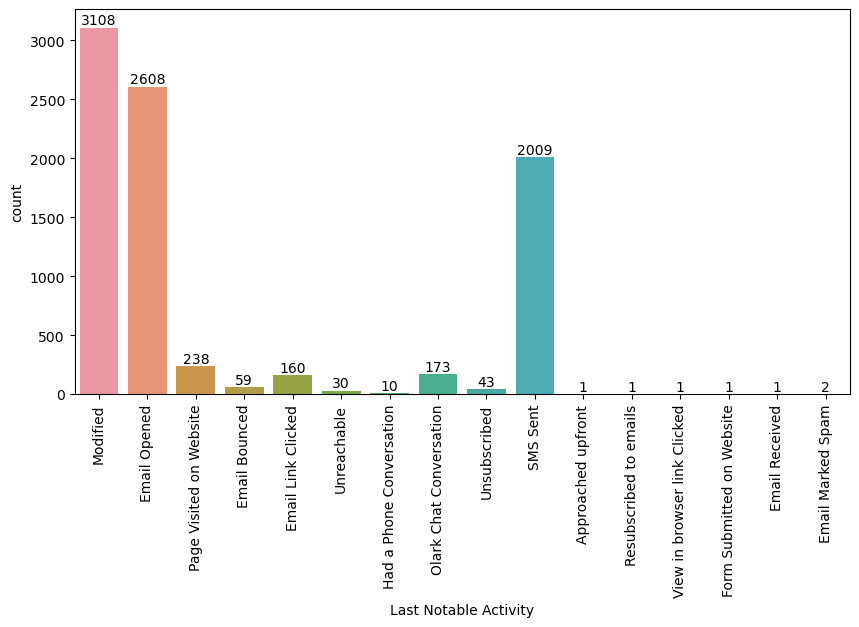

In [92]:
# Ploting total count of Last Notable Activity:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Last Notable Activity"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

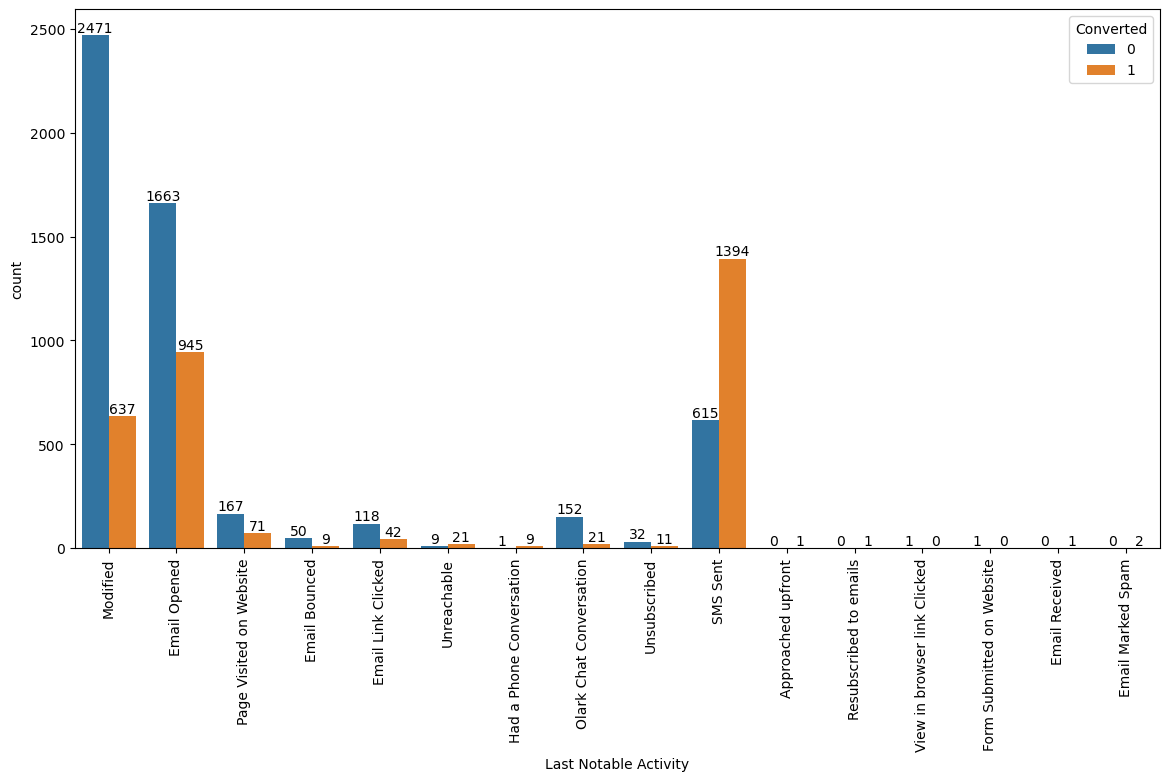

In [93]:
# Ploting total count of Last Notable Activity W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Last Notable Activity"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)    
plt.show()

#### <font color='brown'> Last Notable activity seems to have no real effect on the conversion rate.

#### <font color='brown'> We will drop columns which does not provide any relevant information.

In [94]:
lead_df = lead_df.drop(['Prospect ID', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' ], axis = 1)

In [95]:
lead_df.shape

(8445, 14)

### <font color='blue'>Numerical Variables

### <font color='green'>TotalVisits

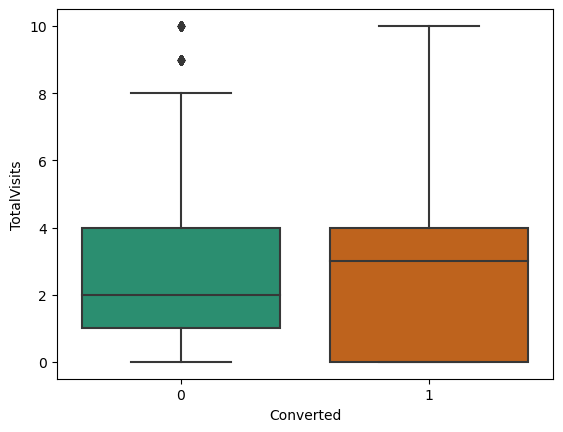

In [96]:
# plotting box plot for Total Visits.
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df ,palette='Dark2')
plt.show()

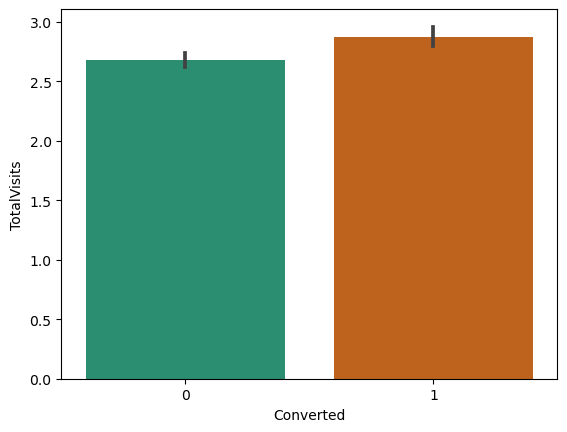

In [97]:
# plotting bar plot for Total Visits.
sns.barplot(y = 'TotalVisits', x = 'Converted', data = lead_df, palette='Dark2')
plt.show()

#### <font color='brown'> Customers/Leads with more visits on the website are more likely to be converted.

### <font color='green'>Total Time Spent on Website

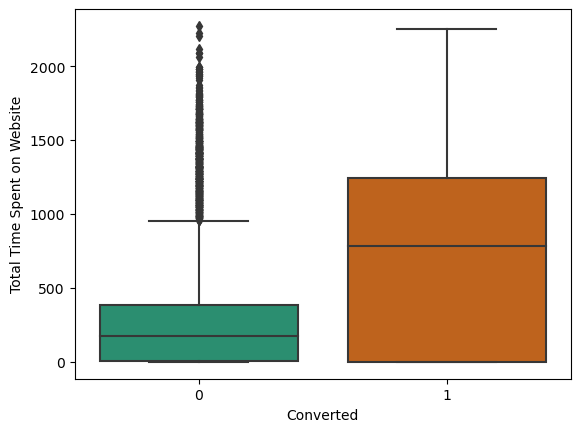

In [98]:
# plotting box plot for Total Time Spent on Website.
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df ,palette='Dark2')
plt.show()

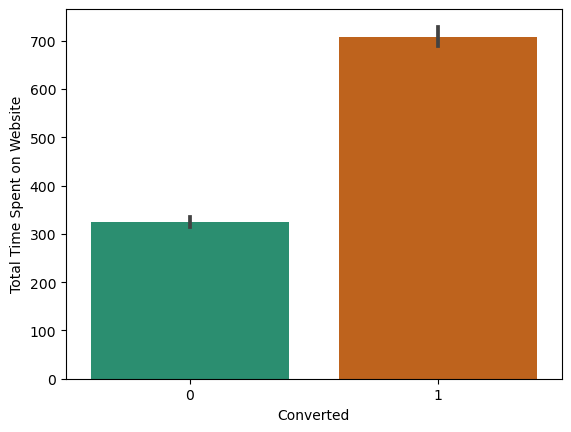

In [99]:
# plotting bar plot for Total Time Spent on Website.
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df, palette='Dark2')
plt.show()

#### <font color='brown'> Customers/Leads with more Time Spent on Website are more likely to be converted.

### <font color='green'>Page Views Per Visit

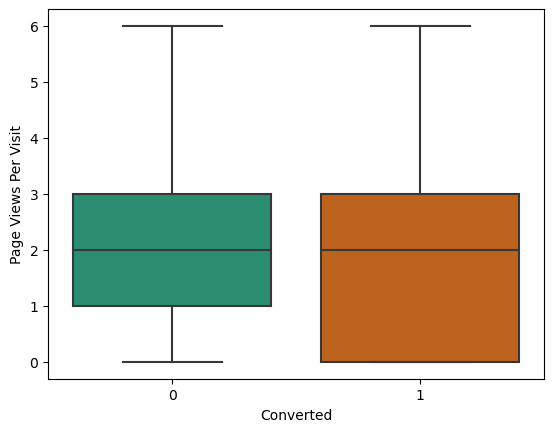

In [100]:
# plotting box plot for Page Views Per Visit.
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df ,palette='Dark2')
plt.show()

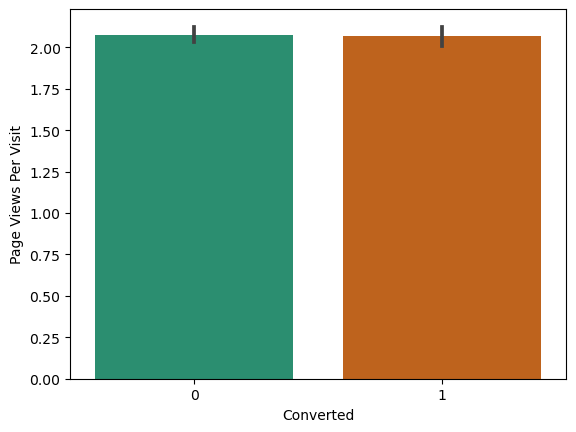

In [101]:
# plotting bar plot for Page Views Per Visit.
sns.barplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df, palette='Dark2')
plt.show()

#### <font color='brown'> There is no noticable difference in customerl/leads conversion rate W.R.T Page Views Per Visit 

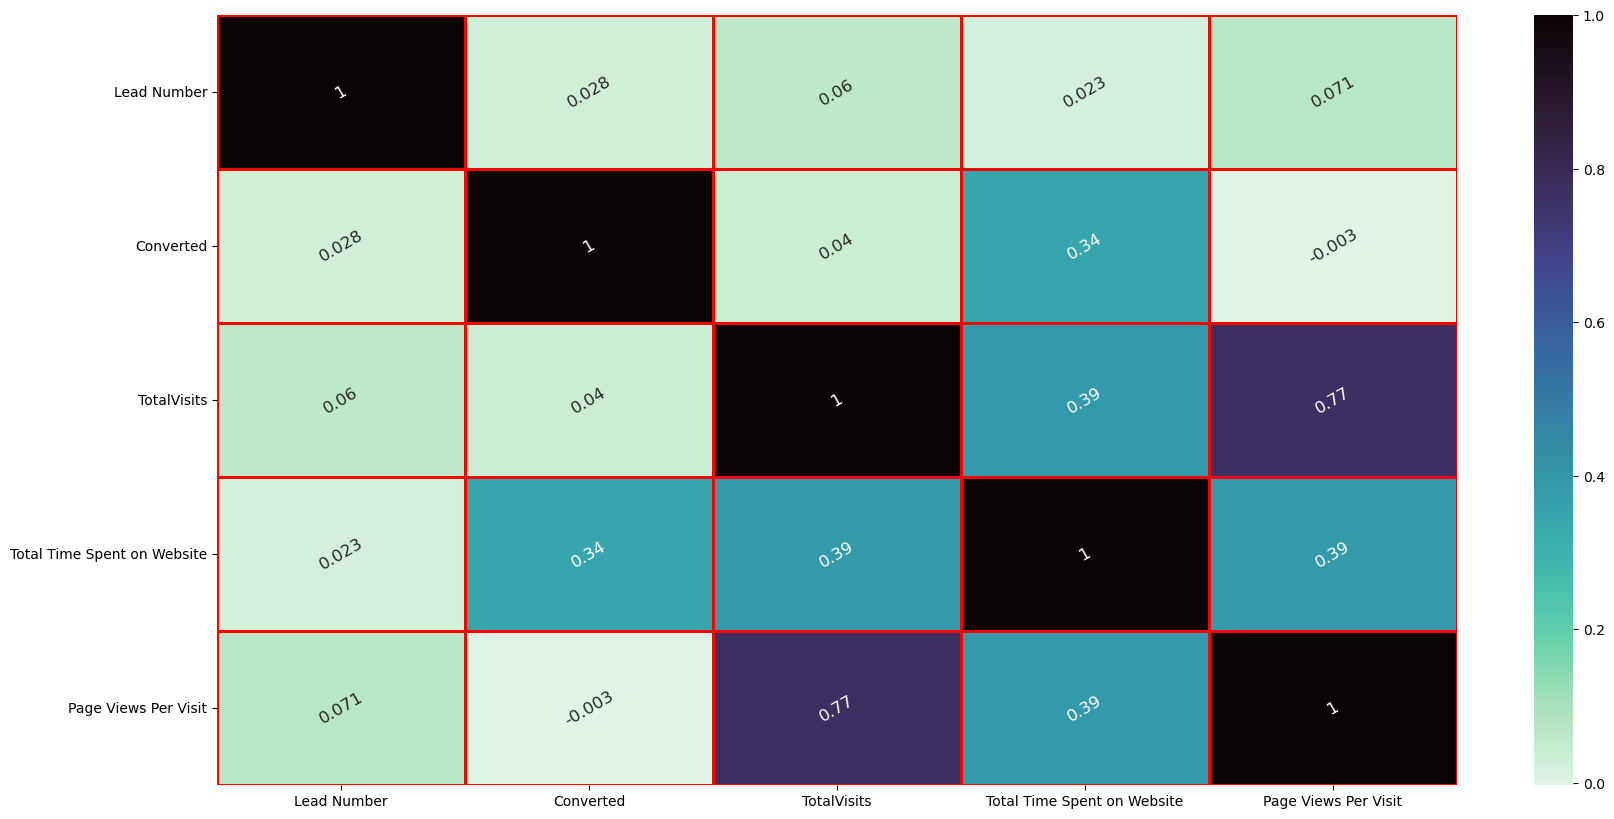

In [102]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True, annot_kws={'size': 12,'rotation':30}, cmap="mako_r", linewidth = 1, linecolor="red")
plt.show()

In [103]:
lead_df.shape 

(8445, 14)

### <font color = 'green'> Recommendation Based on EDA. 

#### <font color = 'Brown'> => To improve overall lead conversion rate, client should focus on improving lead conversion of API and Landing Page Submission and generate more leads from Lead Add Form.
    
#### <font color = 'Brown'> => To improve overall lead conversion rate, client should focus on improving lead converion of Google and Direct Traffic leads and generate more leads from reference and welingak website.
    
#### <font color = 'Brown'> => Customers/Leads with more Visits and more Time Spent on Website are more likely to be converted.
    
#### <font color = 'Brown'> => More focus to be given to cities other than Mumbai as they have higher conversion rate compared to Mumbai but has less number of leads

## <font color = 'indigo'>Data Preperation for Model Building

### <font color = 'green'>Converting binary variables 

In [104]:
# Changing Yes to 1 and No to 0 using map function on Do Not Email.
lead_df['Do Not Email'] = lead_df['Do Not Email'].map({'Yes': 1, 'No': 0})

In [105]:
# Changing Yes to 1 and No to 0 using map function on A free copy of Mastering The Interview.
lead_df['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [106]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Mumbai,0,Modified


In [107]:
lead_df.shape

(8445, 14)

### <font color = 'green'>  For categorical variables with multiple levels, create dummy features

In [108]:
# Creating a dummy variable for some of the categorical variables.
dummy1 = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City', 'Last Notable Activity']],drop_first=True, dtype = int)

# Adding the results to the master dataframe
lead_df = pd.concat([lead_df, dummy1], axis=1)

In [109]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Mumbai,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [110]:
# Dropping the columns for which dummies were created
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'City', 'Last Notable Activity'], axis = 1)

In [111]:
lead_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [112]:
lead_df["Lead Number"].nunique()

8445

In [113]:
lead_df.shape

(8445, 89)

In [114]:
# Checking for data types of all variables. 

print(lead_df.dtypes)

Lead Number                                               int64
Do Not Email                                              int64
Converted                                                 int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
A free copy of Mastering The Interview                    int64
Lead Origin_Landing Page Submission                       int32
Lead Origin_Lead Add Form                                 int32
Lead Origin_Lead Import                                   int32
Lead Source_Direct Traffic                                int32
Lead Source_Facebook                                      int32
Lead Source_Google                                        int32
Lead Source_Live Chat                                     int32
Lead Source_NC_EDM                                        int32
Lead Source_Olark Chat                  

## <font color = 'indigo'>Test-Train Split

In [115]:
# Putting feature variable to X
X = lead_df.drop(['Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [116]:
# Putting variable to y
y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [117]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## <font color = 'indigo'>Feature Scaling

In [118]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.0,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.0,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.00000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.0,5911.000000,5911.000000,5911.000000,5911.000000,5911.0,5911.000000,5911.000000,5911.000000,5911.000000
mean,0.077313,2.736085,467.354424,2.061056,0.295551,0.519201,0.068686,0.003891,0.276603,0.003891,0.323296,0.000338,0.000169,0.208932,0.105566,0.000169,0.000169,0.054475,0.01

In [119]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5279,1,2.0,-0.504462,-0.037025,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3099,0,2.0,-0.480383,-0.037025,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
91,0,6.0,1.279233,-0.340229,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1577,0,0.0,-0.865647,-1.249840,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
487,0,2.0,-0.617448,-0.037025,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [120]:
# Checking the success rate
Lead_success_rate = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Lead_success_rate

37.47779751332149

## <font color = 'indigo'> Model Building

In [121]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5832
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 11 Aug 2023   Deviance:                   1.2489e+05
Time:                        15:27:15   Pearson chi2:                 6.11e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.006e+15   7.69e+07   1.31e+07      0.000    1.01e+15    1.01e+15
Do Not Email                                          -4.22e+14   4.69e+06     -9e+07      0.000   -4.22e+14   -4.22e+14
TotalVisits                                          -2.948e+13   6.42e+05  -4.59e+07      0.000   -2.95e+13   -2.95e+13
Total Time Spent on Website                           8.778e+14   1.03e+06   8.51e+08      0.000    8.78e+14    8.78e+14
Page Views Per Visit                                 -7.267e+13   1.65e+06   -4.4e+07      0.000   -7.27e+13   -7.27e+13
A free copy of Mastering The Interview                1.403e+13   2.91e+06   4.83e+06      0.000     1.4e+13     1.4e+13
Lead Origin_Landing Page Submission                   1.128e+14   3.58e+06   3.15e+07      0.000    1.13e+14    1.13e+14
Lead Origin_Lead Add Form                             7.328e+14   4.77e+07   1.54e+07      0.000    7.33e+14    7.33e+14
Lead Origin_Lead Import                               9.126e+14   3.44e+07   2.65e+07      0.000    9.13e+14    9.13e+14
Lead Source_Direct Traffic                            5.635e+14   6.74e+07   8.36e+06      0.000    5.64e+14    5.64e+14
Lead Source_Facebook                                  9.126e+14   3.44e+07   2.65e+07      0.000    9.13e+14    9.13e+14
Lead Source_Google                                    6.886e+14   6.74e+07   1.02e+07      0.000    6.89e+14    6.89e+14
Lead Source_Live Chat                                 5.841e+15   6.73e+07   8.67e+07      0.000    5.84e+15    5.84e+15
Lead Source_NC_EDM                                    4.736e+15   9.52e+07   4.98e+07      0.000    4.74e+15    4.74e+15
Lead Source_Olark Chat                                8.523e+14   6.74e+07   1.26e+07      0.000    8.52e+14    8.52e+14
Lead Source_Organic Search                            7.456e+14   6.74e+07   1.11e+07      0.000    7.46e+14    7.46e+14
Lead Source_Pay per Click Ads                        -3.008e+15   9.53e+07  -3.16e+07      0.000   -3.01e+15   -3.01e+15
Lead Source_Press_Release                            -2.631e+15   9.56e+07  -2.75e+07      0.000   -2.63e+15   -2.63e+15
Lead Source_Reference                                 1.998e+15   4.78e+07   4.18e+07      0.000       2e+15       2e+15
Lead Source_Referral Sites                            4.303e+14   6.79e+07   6.34e+06      0.000     4.3e+14     4.3e+14
Lead Source_Social Media                               4.44e+15   9.54e+07   4.66e+07      0.000    4.44e+15    4.44e+15
Lead Source_WeLearn                                     22.5483   8.89e-07   2.54e+07      0.000      22.548      22.548
Lead Source_Welingak Website                          2.15

### <font color = 'green'>Feature Selection Using RFE

In [122]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [123]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False])

In [124]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 54),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 42),
 ('A free copy of Mastering The Interview', False, 48),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 43),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_NC_EDM', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Pay per Click Ads', False, 33),
 ('Lead Source_Press_Release', False, 65),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_WeLearn', False, 71),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 61),
 ('Lead Source_blog', False, 36),
 ('Lead Source_testone', False, 35)

In [125]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [126]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last

 ### <font color = 'green'>Assessing the model with StatsModels

In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lead = logm2.fit()
lead.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2407.9
Date:                Fri, 11 Aug 2023   Deviance:                       4815.7
Time:                        15:27:24   Pearson chi2:                 5.69e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3986
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0698      0.058    -18.420      0.000      -1.184      -0.956
Do Not Email                                            -1.1335      0.195     -5.803      0.000      -1.516      -0.751
Total Time Spent on Website                              1.0627      0.042     25.503      0.000       0.981       1.144
Lead Origin_Lead Add Form                                3.4774      0.221     15.724      0.000       3.044       3.911
Lead Source_Olark Chat                                   1.3102      0.108     12.158      0.000       1.099       1.521
Lead Source_Welingak Website                             2.5097      1.034      2.428      0.015       0.484       4.535
Last Activity_Converted to Lead                         -1.1805      0.203     -5.809      0.000      -1.579      -0.782
Last Activity_Email Bounced                             -1.4117      0.487     -2.901      0.004      -2.365      -0.458
Last Activity_Had a Phone Conversation                   2.0536      1.018      2.016      0.044       0.058       4.050
Last Activity_Olark Chat Conversation                   -1.5167      0.173     -8.752      0.000      -1.856      -1.177
What is your current occupation_Housewife               22.8096   1.51e+04      0.002      0.999   -2.96e+04    2.96e+04
What is your current occupation_Not Specified           -1.1508      0.091    -12.684      0.000      -1.329      -0.973
What is your current occupation_Working Professional     2.3184      0.185     12.536      0.000       1.956       2.681
Last Notable Activity_Email Bounced                      1.7658      0.646      2.733      0.006       0.499       3.032
Last Notable Activity_SMS Sent                           1.3570      0.084     16.245      0.000       1.193       1.521
Last Notable Activity_Unreachable                        2.1086      0.546      3.863      0.000       1.039       3.179
========================================================================================================================
"""

In [128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Email Bounced,1.94
0,Do Not Email,1.78
3,Lead Source_Olark Chat,1.74
2,Lead Origin_Lead Add Form,1.50
8,Last Activity_Olark Chat Conversation,1.46
10,What is your current occupation_Not Specified,1.34
1,Total Time Spent on Website,1.28
4,Lead Source_Welingak Website,1.27
12,Last Notable Activity_Email Bounced,1.23
13,Last Notable Activity_SMS Sent,1.22


#### <font color='brown'>VIF values are in acceptable range. S we will drop variables with high P-Value

In [129]:
# Dropping What is your current occupation_Housewife as P-Value is very high
col = col.drop(["What is your current occupation_Housewife"])

In [130]:
# Getting the predicted values on the train set
y_train_pred = lead.predict(X_train_sm)
y_train_pred[:10]

5279    0.004958
3099    0.201959
91      0.832008
1577    0.815732
487     0.053315
758     0.143206
7260    0.165255
7538    0.686915
2404    0.126898
8190    0.945043
dtype: float64

In [131]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00495752, 0.20195866, 0.83200838, 0.81573171, 0.0533148 ,
       0.14320564, 0.16525524, 0.68691535, 0.12689764, 0.9450434 ])

In [132]:
y_train.values

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

### <font color = 'green'>Creating a dataframe with the actual leads and the predicted probabilities

In [133]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.004958,5279
1,0,0.201959,3099
2,1,0.832008,91
3,1,0.815732,1577
4,0,0.053315,487


 ### <font color = 'green'>Creating new column 'Converted_Prob' with 1 if leads_Prob > 0.5 else 0

In [134]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.004958,5279,0
1,0,0.201959,3099,0
2,1,0.832008,91,1
3,1,0.815732,1577,1
4,0,0.053315,487,0


In [135]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3279  415]
 [ 702 1515]]


In [136]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8110302825241076


 ### <font color = 'green'> Model 2

In [137]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lead = logm3.fit()
lead.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2413.8
Date:                Fri, 11 Aug 2023   Deviance:                       4827.6
Time:                        15:27:24   Pearson chi2:                 5.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3974
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0597      0.058    -18.305      0.000      -1.173      -0.946
Do Not Email                                            -1.1377      0.195     -5.825      0.000      -1.521      -0.755
Total Time Spent on Website                              1.0624      0.042     25.525      0.000       0.981       1.144
Lead Origin_Lead Add Form                                3.4847      0.221     15.776      0.000       3.052       3.918
Lead Source_Olark Chat                                   1.3044      0.108     12.116      0.000       1.093       1.515
Lead Source_Welingak Website                             2.4951      1.033      2.414      0.016       0.470       4.521
Last Activity_Converted to Lead                         -1.1887      0.203     -5.851      0.000      -1.587      -0.791
Last Activity_Email Bounced                             -1.4154      0.487     -2.909      0.004      -2.369      -0.462
Last Activity_Had a Phone Conversation                   2.0461      1.019      2.008      0.045       0.049       4.043
Last Activity_Olark Chat Conversation                   -1.5208      0.173     -8.776      0.000      -1.860      -1.181
What is your current occupation_Not Specified           -1.1564      0.091    -12.752      0.000      -1.334      -0.979
What is your current occupation_Working Professional     2.3112      0.185     12.498      0.000       1.949       2.674
Last Notable Activity_Email Bounced                      1.7658      0.646      2.733      0.006       0.499       3.032
Last Notable Activity_SMS Sent                           1.3492      0.083     16.164      0.000       1.186       1.513
Last Notable Activity_Unreachable                        2.1023      0.546      3.850      0.000       1.032       3.172
========================================================================================================================
"""

In [138]:
# Dropping Last Activity_Had a Phone Conversation as P-Value is high
col = col.drop(["Last Activity_Had a Phone Conversation"])

In [139]:
# Getting the predicted values on the train set
y_train_pred = lead.predict(X_train_sm)
y_train_pred[:10]

5279    0.004941
3099    0.201458
91      0.832548
1577    0.818365
487     0.053552
758     0.144471
7260    0.166670
7538    0.688966
2404    0.128044
8190    0.945554
dtype: float64

In [140]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0049411 , 0.2014584 , 0.83254848, 0.81836477, 0.05355163,
       0.14447053, 0.16667042, 0.68896566, 0.12804438, 0.94555359])

In [141]:
y_train.values

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

### <font color = 'green'>Creating a dataframe with the actual leads and the predicted probabilities

In [142]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.004941,5279
1,0,0.201458,3099
2,1,0.832548,91
3,1,0.818365,1577
4,0,0.053552,487


 ### <font color = 'green'>Creating new column 'Converted_Prob' with 1 if leads_Prob > 0.5 else 0

In [143]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.004941,5279,0
1,0,0.201458,3099,0
2,1,0.832548,91,1
3,1,0.818365,1577,1
4,0,0.053552,487,0


In [144]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3278  416]
 [ 703 1514]]


In [145]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8106919302994418


#### <font color='brown'>So overall the accuracy hasn't dropped much.

 ### <font color = 'green'> Model 3

In [146]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lead = logm4.fit()
lead.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2416.2
Date:                Fri, 11 Aug 2023   Deviance:                       4832.4
Time:                        15:27:24   Pearson chi2:                 5.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3969
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0544      0.058    -18.244      0.000      -1.168      -0.941
Do Not Email                                            -1.1313      0.195     -5.788      0.000      -1.514      -0.748
Total Time Spent on Website                              1.0635      0.042     25.574      0.000       0.982       1.145
Lead Origin_Lead Add Form                                3.4873      0.221     15.794      0.000       3.055       3.920
Lead Source_Olark Chat                                   1.3023      0.108     12.106      0.000       1.091       1.513
Lead Source_Welingak Website                             2.4890      1.033      2.408      0.016       0.463       4.514
Last Activity_Converted to Lead                         -1.1953      0.203     -5.882      0.000      -1.594      -0.797
Last Activity_Email Bounced                             -1.4263      0.487     -2.931      0.003      -2.380      -0.472
Last Activity_Olark Chat Conversation                   -1.5242      0.173     -8.795      0.000      -1.864      -1.185
What is your current occupation_Not Specified           -1.1578      0.091    -12.770      0.000      -1.336      -0.980
What is your current occupation_Working Professional     2.3179      0.185     12.552      0.000       1.956       2.680
Last Notable Activity_Email Bounced                      1.7643      0.646      2.730      0.006       0.498       3.031
Last Notable Activity_SMS Sent                           1.3438      0.083     16.107      0.000       1.180       1.507
Last Notable Activity_Unreachable                        2.0980      0.546      3.842      0.000       1.028       3.168
========================================================================================================================
"""

In [147]:
# Getting the predicted values on the train set
y_train_pred = lead.predict(X_train_sm)
y_train_pred[:10]

5279    0.004936
3099    0.201131
91      0.833177
1577    0.819406
487     0.053716
758     0.145038
7260    0.167332
7538    0.690495
2404    0.128542
8190    0.945636
dtype: float64

In [148]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00493585, 0.20113057, 0.83317677, 0.81940643, 0.05371615,
       0.14503823, 0.16733176, 0.69049503, 0.12854167, 0.94563581])

In [149]:
y_train.values

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

### <font color = 'green'>Creating a dataframe with the actual leads and the predicted probabilities

In [150]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.004936,5279
1,0,0.201131,3099
2,1,0.833177,91
3,1,0.819406,1577
4,0,0.053716,487


 ### <font color = 'green'>Creating new column 'Converted_Prob' with 1 if leads_Prob > 0.5 else 0

In [151]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.004936,5279,0
1,0,0.201131,3099,0
2,1,0.833177,91,1
3,1,0.819406,1577,1
4,0,0.053716,487,0


In [152]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3277  417]
 [ 702 1515]]


In [153]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8106919302994418


 ### <font color = 'green'>Checking VIFs

In [154]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Email Bounced,1.94
0,Do Not Email,1.78
3,Lead Source_Olark Chat,1.74
2,Lead Origin_Lead Add Form,1.49
7,Last Activity_Olark Chat Conversation,1.46
8,What is your current occupation_Not Specified,1.34
1,Total Time Spent on Website,1.28
4,Lead Source_Welingak Website,1.27
10,Last Notable Activity_Email Bounced,1.23
11,Last Notable Activity_SMS Sent,1.22


#### <font color='brown'>All variables have a good value for VIF and P-Value. So we need not drop any more variables and we can proceed with making predictions using this model.

### <font color = 'green'>Metrics beyond simply accuracy

In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6833558863328822

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.8871142393069843

In [158]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.1128857606930157


In [159]:
# positive predictive value 
print (TP / float(TP+FP))

0.7841614906832298


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8235737622518221


## <font color = 'indigo'>Plotting the ROC Curve

#### <font color='brown'> An ROC curve demonstrates several things:

#### <font color='brown'>- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    
#### <font color='brown'>- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    
#### <font color='brown'>- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [161]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

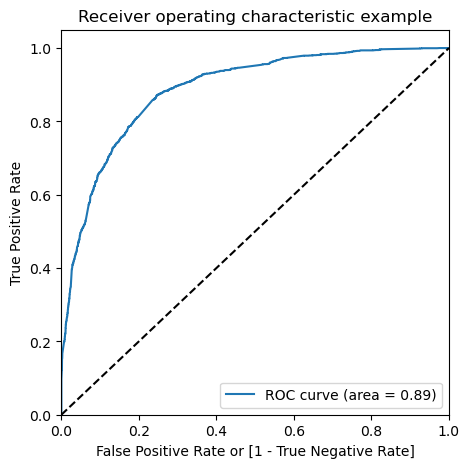

In [163]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## <font color = 'indigo'>Finding Optimal Cutoff Point

In [164]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.004936,5279,0,1,0,0,0,0,0,0,0,0,0
1,0,0.201131,3099,0,1,1,1,0,0,0,0,0,0,0
2,1,0.833177,91,1,1,1,1,1,1,1,1,1,1,0
3,1,0.819406,1577,1,1,1,1,1,1,1,1,1,1,0
4,0,0.053716,487,0,1,0,0,0,0,0,0,0,0,0


In [165]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375063  1.000000  0.000000
0.1   0.1  0.604466  0.978800  0.379805
0.2   0.2  0.758755  0.908435  0.668923
0.3   0.3  0.797327  0.867839  0.755008
0.4   0.4  0.810692  0.761389  0.840282
0.5   0.5  0.810692  0.683356  0.887114
0.6   0.6  0.803248  0.612539  0.917704
0.7   0.7  0.781086  0.502030  0.948565
0.8   0.8  0.760616  0.413171  0.969139
0.9   0.9  0.711724  0.251691  0.987818


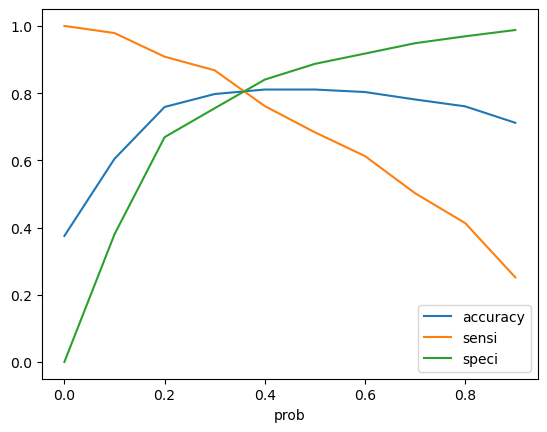

In [166]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### <font color='brown'>From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [167]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.004936,5279,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.201131,3099,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.833177,91,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.819406,1577,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.053716,487,0,1,0,0,0,0,0,0,0,0,0,0


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8076467602774489

In [169]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2988,  706],
       [ 431, 1786]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8055931438881371

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.8088792636708175

In [173]:
# Calculate false postive rate - 
print(FP/ float(TN+FP))

0.19112073632918244


In [174]:
# Positive predictive value 
print (TP / float(TP+FP))

0.71669341894061


In [175]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8739397484644633


## <font color = 'indigo'>Precision and Recall

In [176]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3277,  417],
       [ 702, 1515]], dtype=int64)

### **<font color = 'green'>Precision**
    
<font color = 'green'>TP / TP + FP

In [177]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7841614906832298

### **<font color = 'green'>Recall**

<font color = 'green'>TP / TP + FN

In [178]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6833558863328822

### <font color = 'green'>Using sklearn utilities for the same

In [179]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7841614906832298

In [180]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6833558863328822

## <font color = 'indigo'>Precision and recall tradeoff

In [181]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      0
 13      0
 14      0
 15      0
 16      1
 17      1
 18      0
 19      1
 20      1
 21      0
 22      0
 23      0
 24      0
 25      0
 26      1
 27      0
 28      0
 29      1
 30      0
 31      1
 32      0
 33      0
 34      0
 35      1
 36      1
 37      0
 38      0
 39      1
 40      1
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      1
 48      1
 49      0
 50      0
 51      1
 52      1
 53      0
 54      0
 55      1
 56      1
 57      1
 58      0
 59      1
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      0
 69      0
 70      1
 71      1
 72      0
 73      0
 74      0
 75      1
 76      0
 77      0
 78      0
 79      1
 80      0
 81      1
 82      0
 83      0
 84      0
 85      1
 86      1
 87      0
 88      0
 89      0
 90      1

In [182]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

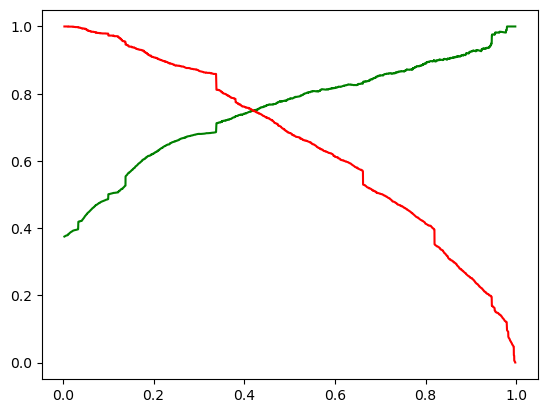

In [183]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## <font color = 'indigo'>Making predictions on the test set

In [184]:
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
1926,0,-0.865647,0,1,0,0,0,0,0,1,0,0,0
5654,0,-0.865647,0,1,0,0,0,1,0,1,0,0,0
1209,0,-0.482236,0,0,0,0,0,0,0,1,0,0,0
5234,0,-0.084007,0,0,0,0,0,0,0,0,0,0,0
8497,0,-0.476679,0,0,0,0,0,0,0,0,0,0,0


In [185]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [186]:
y_test_pred = lead.predict(X_test_sm)

In [187]:
y_test_pred[:10]

1926    0.838238
5654    0.530197
1209    0.679321
5234    0.241637
8497    0.173457
1918    0.050412
7405    0.409217
6561    0.038040
5492    0.870340
7851    0.943481
dtype: float64

In [188]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [189]:
# Let's see the head
y_pred_1.head()

,0
1926,0.838238
5654,0.530197
1209,0.679321
5234,0.241637
8497,0.173457


In [190]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [191]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [192]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [193]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,1926,0.838238
1,0,5654,0.530197
2,0,1209,0.679321
3,0,5234,0.241637
4,0,8497,0.173457


In [194]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [195]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [196]:
# Let's see the head of y_pred_final
y_pred_final.tail()

,Prospect ID,Converted,Converted_Prob
2529,7380,0,0.138177
2530,2051,0,0.161380
2531,8416,0,0.076300
2532,2059,0,0.575439
2533,3387,0,0.184156


In [197]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,1926,1,0.838238,1
1,5654,0,0.530197,1
2,1209,0,0.679321,1
3,5234,0,0.241637,0
4,8497,0,0.173457,0


In [198]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    743
0    205
Name: final_predicted, dtype: int64

In [199]:
# check the precentage of final_predicted conversions on test data

743/float(743+205)

0.7837552742616034

In [200]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final["Converted"], y_pred_final.final_predicted)

0.819258089976322

In [201]:
# Confusion matix
confusion3 = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final.final_predicted )
confusion3 

array([[1333,  253],
       [ 205,  743]], dtype=int64)

In [202]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [203]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8055931438881371

In [204]:
# Let us calculate specificity
TN / float(TN+FP)

0.8088792636708175

## <font color = 'indigo'>Hot leads:

#### <font color='brown'>A higher lead score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. Normally Hot leads have a score of 71 and above.For this analaysis we will consider a lead Score of above 75 as Hot Lead. 

In [205]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,1926,1,0.838238,1,84
1,5654,0,0.530197,1,53
2,1209,0,0.679321,1,68
3,5234,0,0.241637,0,24
4,8497,0,0.173457,0,17


In [206]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"] >= 75]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,1926,1,0.838238,1,84
8,5492,1,0.870340,1,87
9,7851,1,0.943481,1,94
12,99,1,0.750974,1,75
15,5882,1,0.982036,1,98
21,9026,0,0.873156,1,87
22,4155,1,0.890995,1,89
24,1374,1,0.746900,1,75
25,3837,1,0.995251,1,100
34,5822,1,0.994370,1,99


In [207]:
hot_leads['Lead_Score'].shape

(511,)

## <font color = 'indigo'>Important Features from the final model

In [208]:
lead.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.487310
Lead Source_Welingak Website                            2.488954
What is your current occupation_Working Professional    2.317886
Last Notable Activity_Unreachable                       2.098039
Last Notable Activity_Email Bounced                     1.764259
Last Notable Activity_SMS Sent                          1.343821
Lead Source_Olark Chat                                  1.302265
Total Time Spent on Website                             1.063475
const                                                  -1.054385
Do Not Email                                           -1.131338
What is your current occupation_Not Specified          -1.157803
Last Activity_Converted to Lead                        -1.195270
Last Activity_Email Bounced                            -1.426273
Last Activity_Olark Chat Conversation                  -1.524237
dtype: float64

## <font color = 'indigo'>Conclusion

### <font color = 'Green'> Observations
    
#### <font color = 'Green'> Train Data

Train Data Accuracy = 80.81%

Train Data Sensitivity = 80.55%

Train Data specificity = 80.88%
    
#### <font color = 'Green'> Test Data

Test Data Accuracy = 81.93%

Test Data Sensitivity = 80.55%

Test Data specificity = 80.88%

#### <font color='brown'> The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model 
    
#### <font color='brown'> Conversion rate on the final predicted model is around 78%
    
#### <font color='brown'>  There are 511 Hot Leads. They should be targeted as they have a high chance of getting converted. 
    
#### <font color='brown'> We have determined the following features that have the highest positive coefﬁcients, and these  features should be given priority in our marketing and sales efforts to increase lead conversion.
    
#### <font color='brown'>=>Lead Origin_Lead Add Form: 3.49
    
#### <font color='brown'>=>Lead Source_Welingak Website: 2.49
    
#### <font color='brown'>=>Current_occupation_Working Professional: 2.31
    
